In [44]:
## Importing required libraries
import pandas as pd #for data preprocessing

import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb
#Data Visualization Libraries

import matplotlib.pyplot as plt

#Linear Algebra
import numpy as np
 
import seaborn as sns
#Import Datetime module
from datetime import datetime

from sklearn.model_selection import KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split #For splitting

#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#To ignore unnecessary warnings
import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables

In [45]:
#Importing Dataset
train = pd.read_csv('train1.csv')
test = pd.read_csv('test1.csv')

In [46]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [47]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [48]:
#Create submission file using an empty/dummy dataframe
sub_file = pd.DataFrame(columns=['ID', 'Response'])
sub_file.head() 

,ID,Response


In [49]:
#Save test ID in a copy for creating submission file later
sub_file.ID = test.ID
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [50]:
#check for missing values
train.isnull().sum()

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

In [51]:
test.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [52]:
train.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,...,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,...,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,...,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,...,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,...,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,...,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
test.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,...,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,...,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,...,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,...,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,...,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,...,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
#Drop ID from train and test
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [55]:
#Convert Datetime
train['Date_Customer'] = pd.to_datetime(train['Date_Customer'])
test['Date_Customer'] = pd.to_datetime(test['Date_Customer'])


In [56]:
#FEATURE ENGINEERING TO EXTRACT FEATURES FROM DATETIME FOR TRAIN SET
train['Date_Customer_year'] = train['Date_Customer'].dt.year
train['Date_Customer_month'] = train['Date_Customer'].dt.month
train['Date_Customer_week'] = train['Date_Customer'].dt.week
train['Date_Customer_day'] = train['Date_Customer'].dt.day
train['Date_Customer_hour'] = train['Date_Customer'].dt.hour
train['Date_Customer_minute'] = train['Date_Customer'].dt.minute
train['Date_Customer_dayOfWeek'] = train['Date_Customer'].dt.dayofweek
train['Date_Customer_Quarter'] = train['Date_Customer'].dt.quarter
train['Date_Customer_is_month_start'] = train['Date_Customer'].dt.is_month_start
train['Date_Customer_is_month_end'] = train['Date_Customer'].dt.is_month_end
train['year_start'] = train['Date_Customer'].dt.is_year_start
train['year_end'] = train['Date_Customer'].dt.year


<ipython-input-56-d609bbd9b1a0>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  train['Date_Customer_week'] = train['Date_Customer'].dt.week


In [57]:
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Date_Customer_week,Date_Customer_day,Date_Customer_hour,Date_Customer_minute,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,...,25,22,0,0,6,2,False,False,False,2014
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,...,2,8,0,0,1,1,False,False,False,2013
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,...,47,21,0,0,3,4,False,False,False,2013
3,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,...,37,13,0,0,4,3,False,False,False,2013
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,...,4,21,0,0,1,1,False,False,False,2014


In [58]:
#FEATURE ENGINEERING TO EXTRACT FEATURES FROM DATETIME FOR TEST SET
test['Date_Customer_year'] = test['Date_Customer'].dt.year
test['Date_Customer_month'] = test['Date_Customer'].dt.month
test['Date_Customer_week'] = test['Date_Customer'].dt.week
test['Date_Customer_day'] = test['Date_Customer'].dt.day
test['Date_Customer_hour'] = test['Date_Customer'].dt.hour
test['Date_Customer_minute'] = test['Date_Customer'].dt.minute
test['Date_Customer_dayOfWeek'] = test['Date_Customer'].dt.dayofweek
test['Date_Customer_Quarter'] = test['Date_Customer'].dt.quarter
test['Date_Customer_is_month_start'] = test['Date_Customer'].dt.is_month_start
test['Date_Customer_is_month_end'] = test['Date_Customer'].dt.is_month_end
test['year_start'] = test['Date_Customer'].dt.is_year_start
test['year_end'] = test['Date_Customer'].dt.year


<ipython-input-58-34cfd26aaa6f>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  test['Date_Customer_week'] = test['Date_Customer'].dt.week


In [59]:
test.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,...,Date_Customer_week,Date_Customer_day,Date_Customer_hour,Date_Customer_minute,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end
0,1954,Graduation,Single,48556.8,0,1,2013-11-01,85,6,8,...,44,1,0,0,4,4,True,False,False,2013
1,1961,Graduation,Widow,57499.2,0,1,2012-11-22,79,5,7,...,47,22,0,0,3,4,False,False,False,2012
2,1973,Basic,Married,17025.6,0,0,2013-02-28,47,1,2,...,9,28,0,0,3,1,False,True,False,2013
3,1970,Graduation,Together,91983.6,0,0,2013-08-16,98,1,4,...,33,16,0,0,4,3,False,False,False,2013
4,1959,Graduation,Together,78235.2,0,2,2013-07-25,41,2,7,...,30,25,0,0,3,3,False,False,False,2013


FURTHER FEATURE ENGINEERING

In [60]:

train['Education_Level'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

In [61]:
train['Education_Level'] = train['Education_Level'].replace('2n Cycle', "Master")

In [62]:
test['Education_Level'].value_counts().index.sort_values(ascending=True)

Index(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

In [63]:
test['Education_Level'] = train['Education_Level'].replace('2n Cycle', "Master")

In [64]:
train['Education_Level'].value_counts().index.sort_values(ascending=True)

Index(['Basic', 'Graduation', 'Master', 'PhD'], dtype='object')

In [65]:
train['Marital_Status'] = train['Marital_Status'].replace('YOLO', "Single")

In [66]:
train['Marital_Status'] = train['Marital_Status'].replace('Absurd', "Single")

In [67]:
train['Marital_Status'] = train['Marital_Status'].replace('Alone', "Single")

In [68]:
train['Marital_Status'].value_counts()

Married     615
Together    409
Single      335
Divorced    159
Widow        50
Name: Marital_Status, dtype: int64

CREATING NEW COLUMNS FOR COLUMNS WITH SIMILAR FEATURES

In [69]:

train['Yearly_expenses'] = (train[['Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds','Amount_on_Wines']].sum(axis=1))/3
#train['spending'] = train['Disposable_Income']/train['Yearly_expenses']
train['Recent'] = (train[['Recency','WebVisitsMonth']].sum(axis=1))/2
train['purchases'] = (train[['Discounted_Purchases','WebPurchases','CatalogPurchases','StorePurchases']].sum(axis=1))/4

In [70]:

test['Yearly_expenses'] = (test[['Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds','Amount_on_Wines']].sum(axis=1))/3
#train['spending'] = train['Disposable_Income']/train['Yearly_expenses']
test['Recent'] = (test[['Recency','WebVisitsMonth']].sum(axis=1))/2
test['purchases'] = (test[['Discounted_Purchases','WebPurchases','CatalogPurchases','StorePurchases']].sum(axis=1))/4

In [71]:
#DROPPING SIMILAR COLUMNS
train.drop(['Recency','Discounted_Purchases','WebPurchases','CatalogPurchases','StorePurchases'], axis=1, inplace=True)
test.drop(['Recency','Discounted_Purchases','WebPurchases','CatalogPurchases','StorePurchases'], axis=1, inplace=True)

In [72]:
train.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,...,Date_Customer_minute,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases
0,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,71,3,16,...,0,6,2,False,False,False,2014,38.666667,29.5,2.00
1,1958,Graduation,Together,56784.0,0,1,2013-01-08,205,22,111,...,0,1,1,False,False,False,2013,140.666667,11.5,5.00
2,1962,Graduation,Single,103714.8,0,0,2013-11-21,469,31,873,...,0,3,4,False,False,False,2013,485.666667,9.5,4.50
3,1979,Master,Single,46311.6,1,0,2013-09-13,56,15,49,...,0,4,3,False,False,False,2013,61.666667,28.5,2.75
4,1959,Graduation,Married,87486.0,0,0,2014-01-21,412,117,445,...,0,1,1,False,False,False,2014,507.666667,30.0,5.00


In [73]:
#DROPPING SIMILAR COLUMNS IN TEST ALSO
train.drop(['Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds','Amount_on_Wines'], axis=1, inplace=True)
test.drop(['Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts', 'Amount_on_SweetProducts', 'Amount_on_GoldProds','Amount_on_Wines'], axis=1, inplace=True)

In [74]:
test.head()

,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,...,Date_Customer_minute,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases
0,1954,Graduation,Single,48556.8,0,1,2013-11-01,8,0,0,...,0,4,4,True,False,False,2013,212.666667,46.5,6.00
1,1961,Graduation,Widow,57499.2,0,1,2012-11-22,6,0,1,...,0,3,4,False,False,False,2012,204.666667,42.5,5.50
2,1973,Graduation,Married,17025.6,0,0,2013-02-28,6,0,0,...,0,3,1,False,True,False,2013,27.666667,26.5,1.75
3,1970,Master,Together,91983.6,0,0,2013-08-16,2,0,0,...,0,4,3,False,False,False,2013,762.333333,50.0,5.75
4,1959,Graduation,Together,78235.2,0,2,2013-07-25,5,1,0,...,0,3,3,False,False,False,2013,387.666667,23.0,6.50


In [75]:
train['Disposable_Income'].max() - train['Disposable_Income'].min()

797923.2

In [76]:
test['Disposable_Income'].max() - test['Disposable_Income'].min()

189562.8

In [77]:
#USING KNN IMPUTER TO FILL MISSING VALUES IN DISPOSABLE INCOME IN TRAIN
from sklearn.impute import KNNImputer
train['Disposable_Income'] = KNNImputer(n_neighbors=4).fit_transform(train['Disposable_Income'].values.reshape(-1,1))

In [78]:
#USING KNN IMPUTER TO FILL MISSING VALUES IN DISPOSABLE INCOME IN TRAIN
from sklearn.impute import KNNImputer
test['Disposable_Income'] = KNNImputer(n_neighbors=4).fit_transform(test['Disposable_Income'].values.reshape(-1,1))

In [79]:
train['Customers_age'] = 2021 - train['Year_of_Birth']
train.drop('Year_of_Birth', axis=1, inplace=True)

In [80]:
test['Customers_age'] = 2021 - test['Year_of_Birth']
test.drop('Year_of_Birth', axis=1, inplace=True)

In [81]:
train.drop('Date_Customer', axis=1, inplace=True)
test.drop('Date_Customer', axis=1, inplace=True)

In [82]:
train.isnull().sum()

Education_Level                 0
Marital_Status                  0
Disposable_Income               0
No_of_Kids_in_home              0
No_of_Teen_in_home              0
WebVisitsMonth                  0
Cmp3Accepted                    0
Cmp4Accepted                    0
Cmp5Accepted                    0
Cmp1Accepted                    0
Cmp2Accepted                    0
Any_Complain                    0
Response                        0
Date_Customer_year              0
Date_Customer_month             0
Date_Customer_week              0
Date_Customer_day               0
Date_Customer_hour              0
Date_Customer_minute            0
Date_Customer_dayOfWeek         0
Date_Customer_Quarter           0
Date_Customer_is_month_start    0
Date_Customer_is_month_end      0
year_start                      0
year_end                        0
Yearly_expenses                 0
Recent                          0
purchases                       0
Customers_age                   0
dtype: int64

In [83]:
train.isnull().sum()

Education_Level                 0
Marital_Status                  0
Disposable_Income               0
No_of_Kids_in_home              0
No_of_Teen_in_home              0
WebVisitsMonth                  0
Cmp3Accepted                    0
Cmp4Accepted                    0
Cmp5Accepted                    0
Cmp1Accepted                    0
Cmp2Accepted                    0
Any_Complain                    0
Response                        0
Date_Customer_year              0
Date_Customer_month             0
Date_Customer_week              0
Date_Customer_day               0
Date_Customer_hour              0
Date_Customer_minute            0
Date_Customer_dayOfWeek         0
Date_Customer_Quarter           0
Date_Customer_is_month_start    0
Date_Customer_is_month_end      0
year_start                      0
year_end                        0
Yearly_expenses                 0
Recent                          0
purchases                       0
Customers_age                   0
dtype: int64

In [84]:
# We can separate catgorical and numerical column
#categ_cols == categorical columns . Date column excluded
categ_cols = train.select_dtypes(include=['object', 'category']).columns

# num column == numerical columns + date column included
num_cols = [col for col in train.columns if col not in categ_cols]
print(f'The Categorical Columns are: {categ_cols}')
print(f'The Numerical Columns are: {num_cols}')

The Categorical Columns are: Index(['Education_Level', 'Marital_Status'], dtype='object')
The Numerical Columns are: ['Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home', 'WebVisitsMonth', 'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted', 'Cmp2Accepted', 'Any_Complain', 'Response', 'Date_Customer_year', 'Date_Customer_month', 'Date_Customer_week', 'Date_Customer_day', 'Date_Customer_hour', 'Date_Customer_minute', 'Date_Customer_dayOfWeek', 'Date_Customer_Quarter', 'Date_Customer_is_month_start', 'Date_Customer_is_month_end', 'year_start', 'year_end', 'Yearly_expenses', 'Recent', 'purchases', 'Customers_age']


In [85]:
for col in categ_cols:
    print(f'Unique entries in the {col} column in the train set is: {train[col].nunique()}')
    print(f'and the unique entries are: {train[col].unique()}')

Unique entries in the Education_Level column in the train set is: 4
and the unique entries are: ['Graduation' 'Master' 'PhD' 'Basic']
Unique entries in the Marital_Status column in the train set is: 5
and the unique entries are: ['Divorced' 'Together' 'Single' 'Married' 'Widow']


In [86]:
for col in categ_cols:
    print(f'Unique entries in the {col} column in the test set is: {test[col].nunique()}')
    print(f'and the unique entries are: {test[col].unique()}')

Unique entries in the Education_Level column in the test set is: 4
and the unique entries are: ['Graduation' 'Master' 'PhD' 'Basic']
Unique entries in the Marital_Status column in the test set is: 6
and the unique entries are: ['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


In [87]:
print(f'Unique entries in the Target column in  is: {train.Response.nunique()}')
print(f'and the unique entries are: {train.Response.unique()}')

Unique entries in the Target column in  is: 2
and the unique entries are: [0 1]


<AxesSubplot:>

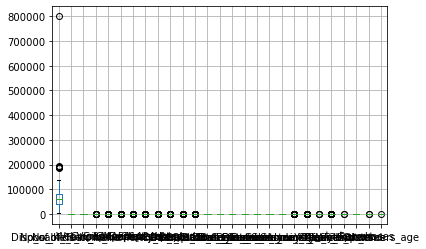

In [88]:
#TO SEE OUTLIERS IN OUR DATA
train.boxplot(num_cols)

In [89]:
train.Response.value_counts()

0    1329
1     239
Name: Response, dtype: int64

<AxesSubplot:>

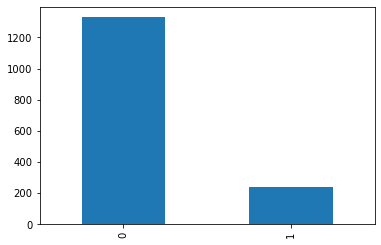

In [90]:
#TO VIEW HOW BALANCED OUR RESPONSE DATA IS
train.Response.value_counts().plot(kind='bar')

In [91]:
#Read train and test again
print(f'The Size of the train set is now: {train.shape}')
train.head()

The Size of the train set is now: (1568, 29)


,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,...,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases,Customers_age
0,Graduation,Divorced,77504.4,1,1,3,0,0,0,0,...,6,2,False,False,False,2014,38.666667,29.5,2.00,66
1,Graduation,Together,56784.0,0,1,6,0,0,0,0,...,1,1,False,False,False,2013,140.666667,11.5,5.00,63
2,Graduation,Single,103714.8,0,0,2,0,0,0,1,...,3,4,False,False,False,2013,485.666667,9.5,4.50,59
3,Master,Single,46311.6,1,0,8,0,0,0,0,...,4,3,False,False,False,2013,61.666667,28.5,2.75,42
4,Graduation,Married,87486.0,0,0,1,0,0,0,1,...,1,1,False,False,False,2014,507.666667,30.0,5.00,62


In [92]:
print(f'The Size of the test set is now: {test.shape}')
test.head()

The Size of the test set is now: (672, 28)


,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,...,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases,Customers_age
0,Graduation,Single,48556.8,0,1,8,0,0,0,0,...,4,4,True,False,False,2013,212.666667,46.5,6.00,67
1,Graduation,Widow,57499.2,0,1,6,0,1,0,0,...,3,4,False,False,False,2012,204.666667,42.5,5.50,60
2,Graduation,Married,17025.6,0,0,6,0,0,0,0,...,3,1,False,True,False,2013,27.666667,26.5,1.75,48
3,Master,Together,91983.6,0,0,2,0,0,1,1,...,4,3,False,False,False,2013,762.333333,50.0,5.75,51
4,Graduation,Together,78235.2,0,2,5,1,0,0,0,...,3,3,False,False,False,2013,387.666667,23.0,6.50,62


In [93]:
# label encoding 
le = LabelEncoder()
for i in categ_cols:
  train[i] = le.fit_transform(train[i])
  test[i] = le.fit_transform(test[i])
train.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,...,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases,Customers_age
0,1,0,77504.4,1,1,3,0,0,0,0,...,6,2,False,False,False,2014,38.666667,29.5,2.00,66
1,1,3,56784.0,0,1,6,0,0,0,0,...,1,1,False,False,False,2013,140.666667,11.5,5.00,63
2,1,2,103714.8,0,0,2,0,0,0,1,...,3,4,False,False,False,2013,485.666667,9.5,4.50,59
3,2,2,46311.6,1,0,8,0,0,0,0,...,4,3,False,False,False,2013,61.666667,28.5,2.75,42
4,1,1,87486.0,0,0,1,0,0,0,1,...,1,1,False,False,False,2014,507.666667,30.0,5.00,62


In [94]:
#Split into X and y
X = train.drop('Response', axis=1)
y = train.Response



SCALING OUR DATA

In [95]:
from sklearn.preprocessing import MinMaxScaler
col= X.columns
sc = MinMaxScaler()

In [96]:
train[col] = sc.fit_transform(train[col])
train.head()

test[col] = sc.transform(test[col])
test.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,...,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases,Customers_age
0,0.333333,0.75,0.058252,0.0,0.5,0.40,0.0,0.0,0.0,0.0,...,0.666667,1.000000,1.0,0.0,0.0,0.5,0.248016,0.801887,0.545455,0.443299
1,0.333333,1.25,0.069459,0.0,0.5,0.30,0.0,1.0,0.0,0.0,...,0.500000,1.000000,0.0,0.0,0.0,0.0,0.238492,0.726415,0.500000,0.371134
2,0.333333,0.50,0.018736,0.0,0.0,0.30,0.0,0.0,0.0,0.0,...,0.500000,0.000000,0.0,1.0,0.0,0.5,0.027778,0.424528,0.159091,0.247423
3,0.666667,1.00,0.112677,0.0,0.0,0.10,0.0,0.0,1.0,1.0,...,0.666667,0.666667,0.0,0.0,0.0,0.5,0.902381,0.867925,0.522727,0.278351
4,0.333333,1.00,0.095447,0.0,1.0,0.25,1.0,0.0,0.0,0.0,...,0.500000,0.666667,0.0,0.0,0.0,0.5,0.456349,0.358491,0.590909,0.391753


In [97]:
#from sklearn.model_selection import StratifiedKFold
#from yellowbrick.model_selection import RFECV
#cv = StratifiedKFold(5)
#visualizer = RFECV(GradientBoostingClassifier(), cv=cv, scoring='f1_weighted')
#visualizer.fit(X, y)
#visualizer.show()

In [98]:

#Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32,stratify=y)

In [99]:
from sklearn.preprocessing import MinMaxScaler
col= X.columns
sc = MinMaxScaler()
X_train[col] = sc.fit_transform(X_train[col])
X_test[col] = sc.fit_transform(X_test[col])


<ipython-input-99-5743aab878ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = sc.fit_transform(X_train[col])
C:\Users\usr\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-99-5743aab878ea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

BALANCING OUR DATA

In [100]:
from collections import Counter
Counter(y_train)

Counter({0: 1063, 1: 191})

In [101]:
from collections import Counter
from imblearn.over_sampling import SMOTE
os=SMOTE(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 1063, 1: 191})
The number of classes after fit Counter({0: 1063, 1: 797})


C:\Users\usr\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [102]:
X_train.head()

,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,...,Date_Customer_dayOfWeek,Date_Customer_Quarter,Date_Customer_is_month_start,Date_Customer_is_month_end,year_start,year_end,Yearly_expenses,Recent,purchases,Customers_age
907,0.666667,0.50,0.052933,0.5,0.5,0.40,0.0,0.0,0.0,0.0,...,0.500000,0.000000,0.0,0.0,0.0,1.0,0.025804,0.500000,0.186047,0.422680
188,1.000000,0.50,0.056336,0.5,0.0,0.25,0.0,0.0,0.0,0.0,...,0.833333,0.333333,0.0,0.0,0.0,1.0,0.050417,0.896226,0.209302,0.226804
991,0.333333,0.75,0.097638,0.5,0.5,0.15,0.0,0.0,0.0,0.0,...,0.000000,0.666667,0.0,0.0,0.0,0.0,0.240572,0.188679,0.511628,0.216495
498,1.000000,0.50,0.062062,0.5,0.5,0.35,0.0,0.0,0.0,0.0,...,0.666667,0.666667,0.0,0.0,0.0,0.5,0.003573,0.915094,0.093023,0.195876
938,0.666667,0.50,0.119079,0.0,0.0,0.05,0.0,0.0,0.0,0.0,...,0.333333,1.000000,0.0,1.0,0.0,0.0,0.297737,0.669811,0.348837,0.103093


USING DIFFERENT ALGORITHS TO SEE WHICH ONE GIVES US THE BEST RESULT

In [103]:
#Bagging Algorithm
from yellowbrick.classifier import ROCAUC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
mod = []
cv_score=[]
model =[AdaBoostClassifier(), BaggingClassifier(), GradientBoostingClassifier(), CatBoostClassifier(), DecisionTreeClassifier(), ExtraTreeClassifier(), KNeighborsClassifier()]
for m in model:
    cv_score.append(cross_val_score(m, X_train_ns, y_train_ns, scoring='f1', cv=5).mean())
    mod.append(m)
model_df=pd.DataFrame(columns=['model','cv_score'])
model_df['model']=mod
model_df['cv_score']=cv_score
model_df.sort_values(by=['cv_score'], ascending=True).style.background_gradient(subset=['cv_score'])

Learning rate set to 0.012208
0:	learn: 0.6872881	total: 187ms	remaining: 3m 7s
1:	learn: 0.6777690	total: 209ms	remaining: 1m 44s
2:	learn: 0.6684453	total: 226ms	remaining: 1m 14s
3:	learn: 0.6598229	total: 239ms	remaining: 59.4s
4:	learn: 0.6532325	total: 250ms	remaining: 49.8s
5:	learn: 0.6445156	total: 263ms	remaining: 43.5s
6:	learn: 0.6374450	total: 275ms	remaining: 39s
7:	learn: 0.6301791	total: 287ms	remaining: 35.6s
8:	learn: 0.6235777	total: 299ms	remaining: 32.9s
9:	learn: 0.6172618	total: 311ms	remaining: 30.8s
10:	learn: 0.6113897	total: 323ms	remaining: 29s
11:	learn: 0.6060002	total: 335ms	remaining: 27.6s
12:	learn: 0.6004183	total: 347ms	remaining: 26.4s
13:	learn: 0.5942135	total: 359ms	remaining: 25.3s
14:	learn: 0.5874904	total: 371ms	remaining: 24.4s
15:	learn: 0.5813824	total: 384ms	remaining: 23.6s
16:	learn: 0.5763646	total: 396ms	remaining: 22.9s
17:	learn: 0.5700381	total: 416ms	remaining: 22.7s
18:	learn: 0.5647390	total: 431ms	remaining: 22.2s
19:	learn: 0.

166:	learn: 0.2439813	total: 2.39s	remaining: 11.9s
167:	learn: 0.2432783	total: 2.4s	remaining: 11.9s
168:	learn: 0.2422523	total: 2.41s	remaining: 11.9s
169:	learn: 0.2410515	total: 2.42s	remaining: 11.8s
170:	learn: 0.2401188	total: 2.43s	remaining: 11.8s
171:	learn: 0.2391619	total: 2.44s	remaining: 11.7s
172:	learn: 0.2381902	total: 2.45s	remaining: 11.7s
173:	learn: 0.2374967	total: 2.46s	remaining: 11.7s
174:	learn: 0.2367380	total: 2.46s	remaining: 11.6s
175:	learn: 0.2359105	total: 2.48s	remaining: 11.6s
176:	learn: 0.2351103	total: 2.49s	remaining: 11.6s
177:	learn: 0.2343313	total: 2.5s	remaining: 11.5s
178:	learn: 0.2337231	total: 2.51s	remaining: 11.5s
179:	learn: 0.2331273	total: 2.52s	remaining: 11.5s
180:	learn: 0.2323314	total: 2.53s	remaining: 11.5s
181:	learn: 0.2314874	total: 2.54s	remaining: 11.4s
182:	learn: 0.2303784	total: 2.55s	remaining: 11.4s
183:	learn: 0.2298303	total: 2.56s	remaining: 11.4s
184:	learn: 0.2290967	total: 2.58s	remaining: 11.4s
185:	learn: 0.

326:	learn: 0.1535393	total: 3.94s	remaining: 8.11s
327:	learn: 0.1531373	total: 3.95s	remaining: 8.09s
328:	learn: 0.1526231	total: 3.96s	remaining: 8.07s
329:	learn: 0.1522793	total: 3.96s	remaining: 8.05s
330:	learn: 0.1520874	total: 3.97s	remaining: 8.03s
331:	learn: 0.1516818	total: 3.98s	remaining: 8.01s
332:	learn: 0.1513112	total: 3.99s	remaining: 7.99s
333:	learn: 0.1508665	total: 4s	remaining: 7.97s
334:	learn: 0.1505433	total: 4s	remaining: 7.95s
335:	learn: 0.1501016	total: 4.01s	remaining: 7.93s
336:	learn: 0.1498125	total: 4.02s	remaining: 7.91s
337:	learn: 0.1494169	total: 4.03s	remaining: 7.89s
338:	learn: 0.1490984	total: 4.04s	remaining: 7.87s
339:	learn: 0.1487317	total: 4.04s	remaining: 7.85s
340:	learn: 0.1484427	total: 4.05s	remaining: 7.83s
341:	learn: 0.1480759	total: 4.06s	remaining: 7.81s
342:	learn: 0.1477943	total: 4.07s	remaining: 7.79s
343:	learn: 0.1474151	total: 4.08s	remaining: 7.77s
344:	learn: 0.1470300	total: 4.08s	remaining: 7.75s
345:	learn: 0.1467

509:	learn: 0.1036623	total: 5.44s	remaining: 5.23s
510:	learn: 0.1035400	total: 5.45s	remaining: 5.21s
511:	learn: 0.1033682	total: 5.45s	remaining: 5.2s
512:	learn: 0.1030307	total: 5.46s	remaining: 5.18s
513:	learn: 0.1028843	total: 5.46s	remaining: 5.17s
514:	learn: 0.1027655	total: 5.47s	remaining: 5.15s
515:	learn: 0.1025014	total: 5.48s	remaining: 5.14s
516:	learn: 0.1023427	total: 5.48s	remaining: 5.12s
517:	learn: 0.1022076	total: 5.49s	remaining: 5.11s
518:	learn: 0.1020353	total: 5.5s	remaining: 5.09s
519:	learn: 0.1018394	total: 5.5s	remaining: 5.08s
520:	learn: 0.1015396	total: 5.51s	remaining: 5.07s
521:	learn: 0.1012563	total: 5.51s	remaining: 5.05s
522:	learn: 0.1009067	total: 5.52s	remaining: 5.04s
523:	learn: 0.1007777	total: 5.53s	remaining: 5.02s
524:	learn: 0.1004995	total: 5.53s	remaining: 5.01s
525:	learn: 0.1003176	total: 5.54s	remaining: 4.99s
526:	learn: 0.1001992	total: 5.55s	remaining: 4.98s
527:	learn: 0.0999918	total: 5.55s	remaining: 4.96s
528:	learn: 0.0

683:	learn: 0.0718855	total: 6.55s	remaining: 3.03s
684:	learn: 0.0717977	total: 6.56s	remaining: 3.02s
685:	learn: 0.0716832	total: 6.57s	remaining: 3.01s
686:	learn: 0.0715358	total: 6.58s	remaining: 3s
687:	learn: 0.0714430	total: 6.58s	remaining: 2.98s
688:	learn: 0.0712512	total: 6.59s	remaining: 2.97s
689:	learn: 0.0711549	total: 6.59s	remaining: 2.96s
690:	learn: 0.0710043	total: 6.6s	remaining: 2.95s
691:	learn: 0.0708723	total: 6.61s	remaining: 2.94s
692:	learn: 0.0707613	total: 6.61s	remaining: 2.93s
693:	learn: 0.0705983	total: 6.62s	remaining: 2.92s
694:	learn: 0.0704719	total: 6.63s	remaining: 2.91s
695:	learn: 0.0703692	total: 6.63s	remaining: 2.9s
696:	learn: 0.0703054	total: 6.64s	remaining: 2.88s
697:	learn: 0.0700527	total: 6.64s	remaining: 2.87s
698:	learn: 0.0699666	total: 6.65s	remaining: 2.86s
699:	learn: 0.0697956	total: 6.66s	remaining: 2.85s
700:	learn: 0.0696814	total: 6.66s	remaining: 2.84s
701:	learn: 0.0695597	total: 6.67s	remaining: 2.83s
702:	learn: 0.069

850:	learn: 0.0511822	total: 7.67s	remaining: 1.34s
851:	learn: 0.0511209	total: 7.68s	remaining: 1.33s
852:	learn: 0.0510331	total: 7.69s	remaining: 1.32s
853:	learn: 0.0509017	total: 7.7s	remaining: 1.32s
854:	learn: 0.0507874	total: 7.71s	remaining: 1.31s
855:	learn: 0.0507012	total: 7.71s	remaining: 1.3s
856:	learn: 0.0505473	total: 7.72s	remaining: 1.29s
857:	learn: 0.0504443	total: 7.73s	remaining: 1.28s
858:	learn: 0.0503223	total: 7.74s	remaining: 1.27s
859:	learn: 0.0501602	total: 7.75s	remaining: 1.26s
860:	learn: 0.0500914	total: 7.75s	remaining: 1.25s
861:	learn: 0.0499218	total: 7.76s	remaining: 1.24s
862:	learn: 0.0498775	total: 7.77s	remaining: 1.23s
863:	learn: 0.0498115	total: 7.78s	remaining: 1.22s
864:	learn: 0.0497583	total: 7.79s	remaining: 1.22s
865:	learn: 0.0496776	total: 7.79s	remaining: 1.21s
866:	learn: 0.0496100	total: 7.8s	remaining: 1.2s
867:	learn: 0.0495397	total: 7.81s	remaining: 1.19s
868:	learn: 0.0494481	total: 7.82s	remaining: 1.18s
869:	learn: 0.04

22:	learn: 0.5625360	total: 190ms	remaining: 8.08s
23:	learn: 0.5580463	total: 199ms	remaining: 8.1s
24:	learn: 0.5548799	total: 207ms	remaining: 8.07s
25:	learn: 0.5499429	total: 215ms	remaining: 8.04s
26:	learn: 0.5463568	total: 222ms	remaining: 8.01s
27:	learn: 0.5413025	total: 230ms	remaining: 7.97s
28:	learn: 0.5378054	total: 237ms	remaining: 7.94s
29:	learn: 0.5348867	total: 245ms	remaining: 7.91s
30:	learn: 0.5315365	total: 253ms	remaining: 7.91s
31:	learn: 0.5275162	total: 260ms	remaining: 7.87s
32:	learn: 0.5236897	total: 268ms	remaining: 7.84s
33:	learn: 0.5196014	total: 275ms	remaining: 7.82s
34:	learn: 0.5162660	total: 283ms	remaining: 7.79s
35:	learn: 0.5127173	total: 290ms	remaining: 7.77s
36:	learn: 0.5091117	total: 299ms	remaining: 7.78s
37:	learn: 0.5063093	total: 307ms	remaining: 7.76s
38:	learn: 0.5035650	total: 314ms	remaining: 7.74s
39:	learn: 0.5002916	total: 322ms	remaining: 7.72s
40:	learn: 0.4968747	total: 329ms	remaining: 7.7s
41:	learn: 0.4940323	total: 337ms

183:	learn: 0.2777431	total: 1.47s	remaining: 6.51s
184:	learn: 0.2771771	total: 1.48s	remaining: 6.51s
185:	learn: 0.2764651	total: 1.49s	remaining: 6.5s
186:	learn: 0.2754594	total: 1.49s	remaining: 6.49s
187:	learn: 0.2749176	total: 1.5s	remaining: 6.48s
188:	learn: 0.2742203	total: 1.51s	remaining: 6.47s
189:	learn: 0.2737358	total: 1.52s	remaining: 6.47s
190:	learn: 0.2729918	total: 1.52s	remaining: 6.46s
191:	learn: 0.2724444	total: 1.53s	remaining: 6.45s
192:	learn: 0.2719474	total: 1.54s	remaining: 6.44s
193:	learn: 0.2710432	total: 1.55s	remaining: 6.43s
194:	learn: 0.2702349	total: 1.55s	remaining: 6.42s
195:	learn: 0.2693036	total: 1.56s	remaining: 6.41s
196:	learn: 0.2685669	total: 1.57s	remaining: 6.4s
197:	learn: 0.2679367	total: 1.58s	remaining: 6.39s
198:	learn: 0.2673575	total: 1.58s	remaining: 6.38s
199:	learn: 0.2667491	total: 1.59s	remaining: 6.37s
200:	learn: 0.2660573	total: 1.6s	remaining: 6.37s
201:	learn: 0.2655928	total: 1.61s	remaining: 6.36s
202:	learn: 0.26

345:	learn: 0.1964593	total: 2.77s	remaining: 5.24s
346:	learn: 0.1962221	total: 2.78s	remaining: 5.23s
347:	learn: 0.1959059	total: 2.79s	remaining: 5.22s
348:	learn: 0.1955321	total: 2.79s	remaining: 5.21s
349:	learn: 0.1951376	total: 2.8s	remaining: 5.2s
350:	learn: 0.1947721	total: 2.81s	remaining: 5.19s
351:	learn: 0.1944499	total: 2.82s	remaining: 5.18s
352:	learn: 0.1940363	total: 2.83s	remaining: 5.18s
353:	learn: 0.1936971	total: 2.83s	remaining: 5.17s
354:	learn: 0.1934862	total: 2.84s	remaining: 5.16s
355:	learn: 0.1932302	total: 2.85s	remaining: 5.15s
356:	learn: 0.1927708	total: 2.85s	remaining: 5.14s
357:	learn: 0.1923166	total: 2.86s	remaining: 5.13s
358:	learn: 0.1919503	total: 2.87s	remaining: 5.13s
359:	learn: 0.1915611	total: 2.88s	remaining: 5.12s
360:	learn: 0.1912460	total: 2.89s	remaining: 5.11s
361:	learn: 0.1907935	total: 2.9s	remaining: 5.1s
362:	learn: 0.1905189	total: 2.9s	remaining: 5.09s
363:	learn: 0.1902725	total: 2.91s	remaining: 5.09s
364:	learn: 0.189

504:	learn: 0.1509454	total: 4.04s	remaining: 3.96s
505:	learn: 0.1507051	total: 4.05s	remaining: 3.96s
506:	learn: 0.1505400	total: 4.06s	remaining: 3.95s
507:	learn: 0.1504111	total: 4.07s	remaining: 3.94s
508:	learn: 0.1502102	total: 4.07s	remaining: 3.93s
509:	learn: 0.1499285	total: 4.08s	remaining: 3.92s
510:	learn: 0.1496993	total: 4.09s	remaining: 3.91s
511:	learn: 0.1494858	total: 4.1s	remaining: 3.9s
512:	learn: 0.1492459	total: 4.1s	remaining: 3.9s
513:	learn: 0.1489864	total: 4.11s	remaining: 3.89s
514:	learn: 0.1488406	total: 4.12s	remaining: 3.88s
515:	learn: 0.1485489	total: 4.13s	remaining: 3.87s
516:	learn: 0.1483269	total: 4.13s	remaining: 3.86s
517:	learn: 0.1481793	total: 4.14s	remaining: 3.85s
518:	learn: 0.1480160	total: 4.15s	remaining: 3.84s
519:	learn: 0.1478007	total: 4.16s	remaining: 3.84s
520:	learn: 0.1475330	total: 4.16s	remaining: 3.83s
521:	learn: 0.1473636	total: 4.17s	remaining: 3.82s
522:	learn: 0.1471606	total: 4.18s	remaining: 3.81s
523:	learn: 0.14

675:	learn: 0.1168835	total: 5.37s	remaining: 2.58s
676:	learn: 0.1167968	total: 5.38s	remaining: 2.57s
677:	learn: 0.1166141	total: 5.39s	remaining: 2.56s
678:	learn: 0.1163422	total: 5.4s	remaining: 2.55s
679:	learn: 0.1161176	total: 5.41s	remaining: 2.54s
680:	learn: 0.1159118	total: 5.41s	remaining: 2.54s
681:	learn: 0.1157293	total: 5.42s	remaining: 2.53s
682:	learn: 0.1155019	total: 5.43s	remaining: 2.52s
683:	learn: 0.1154117	total: 5.43s	remaining: 2.51s
684:	learn: 0.1153085	total: 5.44s	remaining: 2.5s
685:	learn: 0.1151618	total: 5.45s	remaining: 2.49s
686:	learn: 0.1148730	total: 5.46s	remaining: 2.49s
687:	learn: 0.1146817	total: 5.46s	remaining: 2.48s
688:	learn: 0.1145273	total: 5.47s	remaining: 2.47s
689:	learn: 0.1142955	total: 5.48s	remaining: 2.46s
690:	learn: 0.1141211	total: 5.49s	remaining: 2.45s
691:	learn: 0.1139425	total: 5.5s	remaining: 2.44s
692:	learn: 0.1138219	total: 5.5s	remaining: 2.44s
693:	learn: 0.1136560	total: 5.51s	remaining: 2.43s
694:	learn: 0.11

840:	learn: 0.0928062	total: 6.66s	remaining: 1.26s
841:	learn: 0.0927329	total: 6.67s	remaining: 1.25s
842:	learn: 0.0926170	total: 6.67s	remaining: 1.24s
843:	learn: 0.0925275	total: 6.68s	remaining: 1.23s
844:	learn: 0.0923989	total: 6.69s	remaining: 1.23s
845:	learn: 0.0922623	total: 6.7s	remaining: 1.22s
846:	learn: 0.0921899	total: 6.7s	remaining: 1.21s
847:	learn: 0.0920742	total: 6.71s	remaining: 1.2s
848:	learn: 0.0918462	total: 6.72s	remaining: 1.2s
849:	learn: 0.0917259	total: 6.73s	remaining: 1.19s
850:	learn: 0.0915659	total: 6.73s	remaining: 1.18s
851:	learn: 0.0914216	total: 6.74s	remaining: 1.17s
852:	learn: 0.0913439	total: 6.75s	remaining: 1.16s
853:	learn: 0.0913088	total: 6.76s	remaining: 1.16s
854:	learn: 0.0911464	total: 6.76s	remaining: 1.15s
855:	learn: 0.0910373	total: 6.77s	remaining: 1.14s
856:	learn: 0.0909683	total: 6.78s	remaining: 1.13s
857:	learn: 0.0908240	total: 6.79s	remaining: 1.12s
858:	learn: 0.0906719	total: 6.79s	remaining: 1.11s
859:	learn: 0.09

Learning rate set to 0.012208
0:	learn: 0.6868247	total: 10.6ms	remaining: 10.6s
1:	learn: 0.6789734	total: 18.9ms	remaining: 9.44s
2:	learn: 0.6709582	total: 26.6ms	remaining: 8.86s
3:	learn: 0.6635396	total: 34ms	remaining: 8.47s
4:	learn: 0.6581979	total: 41.8ms	remaining: 8.31s
5:	learn: 0.6516551	total: 49.2ms	remaining: 8.15s
6:	learn: 0.6448423	total: 56ms	remaining: 7.95s
7:	learn: 0.6397138	total: 63.4ms	remaining: 7.86s
8:	learn: 0.6323901	total: 70.7ms	remaining: 7.79s
9:	learn: 0.6266488	total: 78.3ms	remaining: 7.75s
10:	learn: 0.6212031	total: 85.6ms	remaining: 7.7s
11:	learn: 0.6159741	total: 92.7ms	remaining: 7.63s
12:	learn: 0.6111425	total: 100ms	remaining: 7.6s
13:	learn: 0.6059832	total: 107ms	remaining: 7.54s
14:	learn: 0.6012798	total: 115ms	remaining: 7.58s
15:	learn: 0.5972475	total: 125ms	remaining: 7.7s
16:	learn: 0.5916413	total: 135ms	remaining: 7.8s
17:	learn: 0.5858375	total: 144ms	remaining: 7.85s
18:	learn: 0.5810040	total: 152ms	remaining: 7.83s
19:	lea

183:	learn: 0.2929103	total: 1.51s	remaining: 6.68s
184:	learn: 0.2923318	total: 1.51s	remaining: 6.67s
185:	learn: 0.2916623	total: 1.52s	remaining: 6.66s
186:	learn: 0.2911293	total: 1.53s	remaining: 6.65s
187:	learn: 0.2905249	total: 1.54s	remaining: 6.64s
188:	learn: 0.2897071	total: 1.54s	remaining: 6.63s
189:	learn: 0.2892136	total: 1.55s	remaining: 6.62s
190:	learn: 0.2882782	total: 1.56s	remaining: 6.61s
191:	learn: 0.2876550	total: 1.57s	remaining: 6.6s
192:	learn: 0.2870670	total: 1.57s	remaining: 6.59s
193:	learn: 0.2861249	total: 1.58s	remaining: 6.58s
194:	learn: 0.2855967	total: 1.59s	remaining: 6.57s
195:	learn: 0.2849412	total: 1.6s	remaining: 6.55s
196:	learn: 0.2841358	total: 1.6s	remaining: 6.54s
197:	learn: 0.2834895	total: 1.61s	remaining: 6.53s
198:	learn: 0.2827343	total: 1.62s	remaining: 6.52s
199:	learn: 0.2816819	total: 1.63s	remaining: 6.51s
200:	learn: 0.2810933	total: 1.64s	remaining: 6.5s
201:	learn: 0.2801468	total: 1.64s	remaining: 6.5s
202:	learn: 0.279

352:	learn: 0.2037098	total: 3.03s	remaining: 5.55s
353:	learn: 0.2033082	total: 3.04s	remaining: 5.55s
354:	learn: 0.2029029	total: 3.05s	remaining: 5.54s
355:	learn: 0.2026440	total: 3.06s	remaining: 5.54s
356:	learn: 0.2020363	total: 3.07s	remaining: 5.54s
357:	learn: 0.2016642	total: 3.08s	remaining: 5.53s
358:	learn: 0.2013535	total: 3.09s	remaining: 5.52s
359:	learn: 0.2009306	total: 3.1s	remaining: 5.51s
360:	learn: 0.2004763	total: 3.11s	remaining: 5.51s
361:	learn: 0.1999878	total: 3.12s	remaining: 5.5s
362:	learn: 0.1995983	total: 3.13s	remaining: 5.49s
363:	learn: 0.1992624	total: 3.14s	remaining: 5.49s
364:	learn: 0.1988472	total: 3.15s	remaining: 5.48s
365:	learn: 0.1985160	total: 3.16s	remaining: 5.48s
366:	learn: 0.1981960	total: 3.17s	remaining: 5.47s
367:	learn: 0.1978239	total: 3.18s	remaining: 5.47s
368:	learn: 0.1974538	total: 3.19s	remaining: 5.46s
369:	learn: 0.1970658	total: 3.21s	remaining: 5.46s
370:	learn: 0.1967686	total: 3.22s	remaining: 5.46s
371:	learn: 0.

528:	learn: 0.1533074	total: 4.56s	remaining: 4.06s
529:	learn: 0.1530944	total: 4.58s	remaining: 4.06s
530:	learn: 0.1527720	total: 4.58s	remaining: 4.05s
531:	learn: 0.1524523	total: 4.6s	remaining: 4.04s
532:	learn: 0.1522216	total: 4.61s	remaining: 4.04s
533:	learn: 0.1520382	total: 4.62s	remaining: 4.03s
534:	learn: 0.1518524	total: 4.63s	remaining: 4.02s
535:	learn: 0.1516285	total: 4.64s	remaining: 4.01s
536:	learn: 0.1514019	total: 4.65s	remaining: 4s
537:	learn: 0.1511710	total: 4.65s	remaining: 4s
538:	learn: 0.1509422	total: 4.66s	remaining: 3.99s
539:	learn: 0.1505878	total: 4.67s	remaining: 3.98s
540:	learn: 0.1503497	total: 4.68s	remaining: 3.97s
541:	learn: 0.1501292	total: 4.69s	remaining: 3.96s
542:	learn: 0.1499152	total: 4.7s	remaining: 3.95s
543:	learn: 0.1496902	total: 4.71s	remaining: 3.94s
544:	learn: 0.1494473	total: 4.71s	remaining: 3.94s
545:	learn: 0.1491452	total: 4.72s	remaining: 3.93s
546:	learn: 0.1488777	total: 4.74s	remaining: 3.92s
547:	learn: 0.148642

705:	learn: 0.1169160	total: 6.09s	remaining: 2.54s
706:	learn: 0.1167346	total: 6.1s	remaining: 2.53s
707:	learn: 0.1165120	total: 6.11s	remaining: 2.52s
708:	learn: 0.1162900	total: 6.12s	remaining: 2.51s
709:	learn: 0.1161034	total: 6.13s	remaining: 2.5s
710:	learn: 0.1160739	total: 6.14s	remaining: 2.5s
711:	learn: 0.1159495	total: 6.15s	remaining: 2.49s
712:	learn: 0.1158571	total: 6.16s	remaining: 2.48s
713:	learn: 0.1157411	total: 6.16s	remaining: 2.47s
714:	learn: 0.1155893	total: 6.17s	remaining: 2.46s
715:	learn: 0.1154795	total: 6.18s	remaining: 2.45s
716:	learn: 0.1153007	total: 6.19s	remaining: 2.44s
717:	learn: 0.1151940	total: 6.2s	remaining: 2.44s
718:	learn: 0.1150777	total: 6.21s	remaining: 2.43s
719:	learn: 0.1149467	total: 6.22s	remaining: 2.42s
720:	learn: 0.1148134	total: 6.22s	remaining: 2.41s
721:	learn: 0.1146787	total: 6.23s	remaining: 2.4s
722:	learn: 0.1145764	total: 6.24s	remaining: 2.39s
723:	learn: 0.1144167	total: 6.25s	remaining: 2.38s
724:	learn: 0.114

866:	learn: 0.0945648	total: 7.4s	remaining: 1.14s
867:	learn: 0.0944738	total: 7.41s	remaining: 1.13s
868:	learn: 0.0943334	total: 7.42s	remaining: 1.12s
869:	learn: 0.0942380	total: 7.43s	remaining: 1.11s
870:	learn: 0.0940933	total: 7.44s	remaining: 1.1s
871:	learn: 0.0939357	total: 7.44s	remaining: 1.09s
872:	learn: 0.0937465	total: 7.45s	remaining: 1.08s
873:	learn: 0.0935964	total: 7.46s	remaining: 1.07s
874:	learn: 0.0934823	total: 7.47s	remaining: 1.07s
875:	learn: 0.0934021	total: 7.47s	remaining: 1.06s
876:	learn: 0.0933012	total: 7.48s	remaining: 1.05s
877:	learn: 0.0931876	total: 7.49s	remaining: 1.04s
878:	learn: 0.0931780	total: 7.5s	remaining: 1.03s
879:	learn: 0.0930368	total: 7.5s	remaining: 1.02s
880:	learn: 0.0929908	total: 7.51s	remaining: 1.01s
881:	learn: 0.0928979	total: 7.52s	remaining: 1s
882:	learn: 0.0927305	total: 7.53s	remaining: 997ms
883:	learn: 0.0926050	total: 7.53s	remaining: 989ms
884:	learn: 0.0924807	total: 7.54s	remaining: 980ms
885:	learn: 0.09231

24:	learn: 0.5505371	total: 191ms	remaining: 7.45s
25:	learn: 0.5458570	total: 200ms	remaining: 7.49s
26:	learn: 0.5422792	total: 207ms	remaining: 7.47s
27:	learn: 0.5379276	total: 217ms	remaining: 7.52s
28:	learn: 0.5342443	total: 224ms	remaining: 7.5s
29:	learn: 0.5318126	total: 232ms	remaining: 7.49s
30:	learn: 0.5280269	total: 239ms	remaining: 7.47s
31:	learn: 0.5244104	total: 247ms	remaining: 7.46s
32:	learn: 0.5200410	total: 254ms	remaining: 7.44s
33:	learn: 0.5166206	total: 264ms	remaining: 7.49s
34:	learn: 0.5131473	total: 271ms	remaining: 7.47s
35:	learn: 0.5097872	total: 278ms	remaining: 7.45s
36:	learn: 0.5071843	total: 286ms	remaining: 7.44s
37:	learn: 0.5039353	total: 293ms	remaining: 7.43s
38:	learn: 0.5006760	total: 301ms	remaining: 7.43s
39:	learn: 0.4975396	total: 309ms	remaining: 7.42s
40:	learn: 0.4936418	total: 317ms	remaining: 7.4s
41:	learn: 0.4910472	total: 327ms	remaining: 7.45s
42:	learn: 0.4880650	total: 337ms	remaining: 7.5s
43:	learn: 0.4852312	total: 348ms	

184:	learn: 0.2856656	total: 1.53s	remaining: 6.73s
185:	learn: 0.2850743	total: 1.53s	remaining: 6.71s
186:	learn: 0.2842760	total: 1.54s	remaining: 6.71s
187:	learn: 0.2838797	total: 1.55s	remaining: 6.7s
188:	learn: 0.2832795	total: 1.56s	remaining: 6.69s
189:	learn: 0.2824528	total: 1.57s	remaining: 6.68s
190:	learn: 0.2818296	total: 1.58s	remaining: 6.68s
191:	learn: 0.2812036	total: 1.58s	remaining: 6.67s
192:	learn: 0.2806122	total: 1.59s	remaining: 6.66s
193:	learn: 0.2799721	total: 1.6s	remaining: 6.64s
194:	learn: 0.2793356	total: 1.61s	remaining: 6.63s
195:	learn: 0.2786971	total: 1.61s	remaining: 6.62s
196:	learn: 0.2779594	total: 1.62s	remaining: 6.61s
197:	learn: 0.2770718	total: 1.63s	remaining: 6.6s
198:	learn: 0.2762531	total: 1.64s	remaining: 6.59s
199:	learn: 0.2755660	total: 1.64s	remaining: 6.58s
200:	learn: 0.2748688	total: 1.65s	remaining: 6.57s
201:	learn: 0.2740379	total: 1.66s	remaining: 6.55s
202:	learn: 0.2734964	total: 1.67s	remaining: 6.54s
203:	learn: 0.2

343:	learn: 0.2069295	total: 2.81s	remaining: 5.37s
344:	learn: 0.2065667	total: 2.82s	remaining: 5.36s
345:	learn: 0.2061227	total: 2.83s	remaining: 5.35s
346:	learn: 0.2054817	total: 2.84s	remaining: 5.34s
347:	learn: 0.2050127	total: 2.85s	remaining: 5.33s
348:	learn: 0.2045998	total: 2.85s	remaining: 5.33s
349:	learn: 0.2043541	total: 2.86s	remaining: 5.32s
350:	learn: 0.2040150	total: 2.87s	remaining: 5.31s
351:	learn: 0.2035014	total: 2.88s	remaining: 5.3s
352:	learn: 0.2030996	total: 2.88s	remaining: 5.29s
353:	learn: 0.2026007	total: 2.89s	remaining: 5.28s
354:	learn: 0.2023280	total: 2.9s	remaining: 5.27s
355:	learn: 0.2020027	total: 2.91s	remaining: 5.26s
356:	learn: 0.2013726	total: 2.92s	remaining: 5.25s
357:	learn: 0.2009686	total: 2.92s	remaining: 5.24s
358:	learn: 0.2005885	total: 2.93s	remaining: 5.23s
359:	learn: 0.2003112	total: 2.94s	remaining: 5.22s
360:	learn: 0.1999472	total: 2.95s	remaining: 5.21s
361:	learn: 0.1994671	total: 2.95s	remaining: 5.21s
362:	learn: 0.

506:	learn: 0.1583418	total: 4.14s	remaining: 4.03s
507:	learn: 0.1580835	total: 4.15s	remaining: 4.02s
508:	learn: 0.1578901	total: 4.16s	remaining: 4.01s
509:	learn: 0.1576814	total: 4.17s	remaining: 4s
510:	learn: 0.1575416	total: 4.17s	remaining: 3.99s
511:	learn: 0.1573701	total: 4.18s	remaining: 3.98s
512:	learn: 0.1570897	total: 4.19s	remaining: 3.98s
513:	learn: 0.1568107	total: 4.2s	remaining: 3.97s
514:	learn: 0.1566132	total: 4.2s	remaining: 3.96s
515:	learn: 0.1563498	total: 4.21s	remaining: 3.95s
516:	learn: 0.1561011	total: 4.22s	remaining: 3.94s
517:	learn: 0.1559143	total: 4.23s	remaining: 3.93s
518:	learn: 0.1557183	total: 4.23s	remaining: 3.92s
519:	learn: 0.1554588	total: 4.24s	remaining: 3.92s
520:	learn: 0.1551628	total: 4.25s	remaining: 3.91s
521:	learn: 0.1548892	total: 4.26s	remaining: 3.9s
522:	learn: 0.1547105	total: 4.26s	remaining: 3.89s
523:	learn: 0.1545238	total: 4.27s	remaining: 3.88s
524:	learn: 0.1543293	total: 4.28s	remaining: 3.87s
525:	learn: 0.1540

668:	learn: 0.1251986	total: 5.47s	remaining: 2.71s
669:	learn: 0.1251155	total: 5.48s	remaining: 2.7s
670:	learn: 0.1248941	total: 5.49s	remaining: 2.69s
671:	learn: 0.1246732	total: 5.5s	remaining: 2.68s
672:	learn: 0.1245240	total: 5.51s	remaining: 2.67s
673:	learn: 0.1242838	total: 5.51s	remaining: 2.67s
674:	learn: 0.1241403	total: 5.52s	remaining: 2.66s
675:	learn: 0.1239664	total: 5.53s	remaining: 2.65s
676:	learn: 0.1237409	total: 5.54s	remaining: 2.64s
677:	learn: 0.1236300	total: 5.55s	remaining: 2.64s
678:	learn: 0.1234764	total: 5.56s	remaining: 2.63s
679:	learn: 0.1232833	total: 5.57s	remaining: 2.62s
680:	learn: 0.1231296	total: 5.58s	remaining: 2.62s
681:	learn: 0.1229697	total: 5.59s	remaining: 2.61s
682:	learn: 0.1228173	total: 5.6s	remaining: 2.6s
683:	learn: 0.1226130	total: 5.61s	remaining: 2.59s
684:	learn: 0.1224313	total: 5.62s	remaining: 2.58s
685:	learn: 0.1223107	total: 5.63s	remaining: 2.58s
686:	learn: 0.1220882	total: 5.64s	remaining: 2.57s
687:	learn: 0.12

841:	learn: 0.0991209	total: 7.2s	remaining: 1.35s
842:	learn: 0.0989740	total: 7.21s	remaining: 1.34s
843:	learn: 0.0988172	total: 7.22s	remaining: 1.33s
844:	learn: 0.0987219	total: 7.24s	remaining: 1.33s
845:	learn: 0.0986011	total: 7.25s	remaining: 1.32s
846:	learn: 0.0984542	total: 7.26s	remaining: 1.31s
847:	learn: 0.0983326	total: 7.27s	remaining: 1.3s
848:	learn: 0.0981653	total: 7.28s	remaining: 1.29s
849:	learn: 0.0980076	total: 7.29s	remaining: 1.29s
850:	learn: 0.0979086	total: 7.3s	remaining: 1.28s
851:	learn: 0.0977972	total: 7.31s	remaining: 1.27s
852:	learn: 0.0976809	total: 7.32s	remaining: 1.26s
853:	learn: 0.0975958	total: 7.33s	remaining: 1.25s
854:	learn: 0.0973685	total: 7.34s	remaining: 1.25s
855:	learn: 0.0972437	total: 7.35s	remaining: 1.24s
856:	learn: 0.0971394	total: 7.36s	remaining: 1.23s
857:	learn: 0.0970459	total: 7.37s	remaining: 1.22s
858:	learn: 0.0969958	total: 7.37s	remaining: 1.21s
859:	learn: 0.0968138	total: 7.38s	remaining: 1.2s
860:	learn: 0.09

Learning rate set to 0.012208
0:	learn: 0.6863836	total: 20.7ms	remaining: 20.7s
1:	learn: 0.6781841	total: 39.3ms	remaining: 19.6s
2:	learn: 0.6704500	total: 58ms	remaining: 19.3s
3:	learn: 0.6634954	total: 76.1ms	remaining: 18.9s
4:	learn: 0.6554826	total: 94.3ms	remaining: 18.8s
5:	learn: 0.6484072	total: 113ms	remaining: 18.6s
6:	learn: 0.6428941	total: 131ms	remaining: 18.6s
7:	learn: 0.6356028	total: 149ms	remaining: 18.5s
8:	learn: 0.6294848	total: 168ms	remaining: 18.5s
9:	learn: 0.6233429	total: 188ms	remaining: 18.6s
10:	learn: 0.6176442	total: 220ms	remaining: 19.8s
11:	learn: 0.6131053	total: 239ms	remaining: 19.7s
12:	learn: 0.6076430	total: 257ms	remaining: 19.5s
13:	learn: 0.6025798	total: 276ms	remaining: 19.5s
14:	learn: 0.5976703	total: 303ms	remaining: 19.9s
15:	learn: 0.5924763	total: 322ms	remaining: 19.8s
16:	learn: 0.5878403	total: 341ms	remaining: 19.7s
17:	learn: 0.5818893	total: 361ms	remaining: 19.7s
18:	learn: 0.5771665	total: 379ms	remaining: 19.5s
19:	lear

164:	learn: 0.2964147	total: 3.13s	remaining: 15.8s
165:	learn: 0.2956225	total: 3.15s	remaining: 15.8s
166:	learn: 0.2950474	total: 3.16s	remaining: 15.8s
167:	learn: 0.2942795	total: 3.18s	remaining: 15.7s
168:	learn: 0.2934625	total: 3.19s	remaining: 15.7s
169:	learn: 0.2925726	total: 3.21s	remaining: 15.7s
170:	learn: 0.2916338	total: 3.22s	remaining: 15.6s
171:	learn: 0.2910248	total: 3.23s	remaining: 15.6s
172:	learn: 0.2899155	total: 3.25s	remaining: 15.5s
173:	learn: 0.2892420	total: 3.26s	remaining: 15.5s
174:	learn: 0.2881514	total: 3.28s	remaining: 15.4s
175:	learn: 0.2873338	total: 3.29s	remaining: 15.4s
176:	learn: 0.2866686	total: 3.3s	remaining: 15.4s
177:	learn: 0.2858585	total: 3.33s	remaining: 15.4s
178:	learn: 0.2851223	total: 3.34s	remaining: 15.3s
179:	learn: 0.2844525	total: 3.35s	remaining: 15.3s
180:	learn: 0.2835721	total: 3.37s	remaining: 15.2s
181:	learn: 0.2828248	total: 3.38s	remaining: 15.2s
182:	learn: 0.2819834	total: 3.39s	remaining: 15.2s
183:	learn: 0

323:	learn: 0.2092479	total: 5.31s	remaining: 11.1s
324:	learn: 0.2088148	total: 5.32s	remaining: 11.1s
325:	learn: 0.2084820	total: 5.33s	remaining: 11s
326:	learn: 0.2080026	total: 5.34s	remaining: 11s
327:	learn: 0.2076269	total: 5.35s	remaining: 11s
328:	learn: 0.2072676	total: 5.37s	remaining: 10.9s
329:	learn: 0.2069146	total: 5.38s	remaining: 10.9s
330:	learn: 0.2066952	total: 5.39s	remaining: 10.9s
331:	learn: 0.2064535	total: 5.4s	remaining: 10.9s
332:	learn: 0.2061269	total: 5.41s	remaining: 10.8s
333:	learn: 0.2057798	total: 5.42s	remaining: 10.8s
334:	learn: 0.2053382	total: 5.43s	remaining: 10.8s
335:	learn: 0.2050455	total: 5.44s	remaining: 10.8s
336:	learn: 0.2046992	total: 5.45s	remaining: 10.7s
337:	learn: 0.2042441	total: 5.46s	remaining: 10.7s
338:	learn: 0.2037796	total: 5.47s	remaining: 10.7s
339:	learn: 0.2034493	total: 5.48s	remaining: 10.6s
340:	learn: 0.2029515	total: 5.5s	remaining: 10.6s
341:	learn: 0.2026988	total: 5.51s	remaining: 10.6s
342:	learn: 0.202392

488:	learn: 0.1584804	total: 7.03s	remaining: 7.35s
489:	learn: 0.1582040	total: 7.04s	remaining: 7.33s
490:	learn: 0.1580047	total: 7.05s	remaining: 7.31s
491:	learn: 0.1576700	total: 7.06s	remaining: 7.29s
492:	learn: 0.1575437	total: 7.07s	remaining: 7.27s
493:	learn: 0.1572361	total: 7.08s	remaining: 7.25s
494:	learn: 0.1570693	total: 7.09s	remaining: 7.24s
495:	learn: 0.1568846	total: 7.11s	remaining: 7.22s
496:	learn: 0.1565037	total: 7.12s	remaining: 7.2s
497:	learn: 0.1561892	total: 7.13s	remaining: 7.18s
498:	learn: 0.1559909	total: 7.14s	remaining: 7.17s
499:	learn: 0.1558571	total: 7.15s	remaining: 7.15s
500:	learn: 0.1555925	total: 7.17s	remaining: 7.14s
501:	learn: 0.1552903	total: 7.18s	remaining: 7.12s
502:	learn: 0.1549489	total: 7.19s	remaining: 7.1s
503:	learn: 0.1547087	total: 7.2s	remaining: 7.09s
504:	learn: 0.1544886	total: 7.22s	remaining: 7.07s
505:	learn: 0.1543182	total: 7.23s	remaining: 7.06s
506:	learn: 0.1540967	total: 7.24s	remaining: 7.04s
507:	learn: 0.1

656:	learn: 0.1236657	total: 8.54s	remaining: 4.46s
657:	learn: 0.1234033	total: 8.55s	remaining: 4.44s
658:	learn: 0.1232073	total: 8.56s	remaining: 4.43s
659:	learn: 0.1229227	total: 8.57s	remaining: 4.42s
660:	learn: 0.1227813	total: 8.58s	remaining: 4.4s
661:	learn: 0.1226603	total: 8.59s	remaining: 4.38s
662:	learn: 0.1224993	total: 8.59s	remaining: 4.37s
663:	learn: 0.1223456	total: 8.6s	remaining: 4.35s
664:	learn: 0.1221773	total: 8.61s	remaining: 4.34s
665:	learn: 0.1220566	total: 8.62s	remaining: 4.32s
666:	learn: 0.1218451	total: 8.62s	remaining: 4.3s
667:	learn: 0.1216133	total: 8.63s	remaining: 4.29s
668:	learn: 0.1214978	total: 8.64s	remaining: 4.28s
669:	learn: 0.1213656	total: 8.65s	remaining: 4.26s
670:	learn: 0.1211872	total: 8.66s	remaining: 4.25s
671:	learn: 0.1209573	total: 8.67s	remaining: 4.23s
672:	learn: 0.1207425	total: 8.68s	remaining: 4.22s
673:	learn: 0.1205768	total: 8.69s	remaining: 4.2s
674:	learn: 0.1203872	total: 8.69s	remaining: 4.18s
675:	learn: 0.12

815:	learn: 0.0983502	total: 9.65s	remaining: 2.18s
816:	learn: 0.0981786	total: 9.66s	remaining: 2.16s
817:	learn: 0.0980328	total: 9.66s	remaining: 2.15s
818:	learn: 0.0978677	total: 9.67s	remaining: 2.14s
819:	learn: 0.0977430	total: 9.68s	remaining: 2.12s
820:	learn: 0.0976740	total: 9.68s	remaining: 2.11s
821:	learn: 0.0974843	total: 9.69s	remaining: 2.1s
822:	learn: 0.0973368	total: 9.69s	remaining: 2.08s
823:	learn: 0.0971873	total: 9.7s	remaining: 2.07s
824:	learn: 0.0970790	total: 9.7s	remaining: 2.06s
825:	learn: 0.0970055	total: 9.71s	remaining: 2.04s
826:	learn: 0.0968545	total: 9.72s	remaining: 2.03s
827:	learn: 0.0967576	total: 9.72s	remaining: 2.02s
828:	learn: 0.0966118	total: 9.73s	remaining: 2.01s
829:	learn: 0.0964912	total: 9.73s	remaining: 1.99s
830:	learn: 0.0963861	total: 9.74s	remaining: 1.98s
831:	learn: 0.0963093	total: 9.74s	remaining: 1.97s
832:	learn: 0.0962145	total: 9.75s	remaining: 1.95s
833:	learn: 0.0960717	total: 9.76s	remaining: 1.94s
834:	learn: 0.0

993:	learn: 0.0787086	total: 10.8s	remaining: 65ms
994:	learn: 0.0786123	total: 10.8s	remaining: 54.2ms
995:	learn: 0.0785625	total: 10.8s	remaining: 43.3ms
996:	learn: 0.0784555	total: 10.8s	remaining: 32.5ms
997:	learn: 0.0783698	total: 10.8s	remaining: 21.6ms
998:	learn: 0.0782516	total: 10.8s	remaining: 10.8ms
999:	learn: 0.0781427	total: 10.8s	remaining: 0us


,model,cv_score
4,DecisionTreeClassifier(),0.826099
5,ExtraTreeClassifier(),0.833467
0,AdaBoostClassifier(),0.846648
6,KNeighborsClassifier(),0.854123
1,BaggingClassifier(),0.864939
2,GradientBoostingClassifier(),0.881392
3,,0.910940


USING DIFFERENT HYPER PARAMETERS TO GET THE BEST RESULT

In [104]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700,800,900]}
grid_Grd=GridSearchCV(GradientBoostingClassifier(), param_grid=param, cv=5, scoring='f1')
grid_Grd.fit(X_train_ns, y_train_ns)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


param={'n_estimators': [60,70,80,100,200,300,400,500,600,700,800,900]}
grid_Bag=GridSearchCV(BaggingClassifier(), param_grid=param, cv=5, scoring='f1')
grid_Bag.fit(X_train_ns, y_train_ns)
print(f"Best Estimator: {grid_Bag.best_params_} , Best Score : {grid_Bag.best_score_}")

Best Estimator: {'n_estimators': 70} , Best Score : 0.8840498630506358
Best Estimator: {'n_estimators': 80} , Best Score : 0.8954044184182504


In [105]:
y_pred=grid_Grd.predict(X_test)


In [106]:
print("MODEL F1 score on validation set is : ",f1_score(y_test,y_pred))

MODEL F1 score on validation set is :  0.5161290322580646


In [107]:
fav_preds = grid_Grd.predict(test)

In [108]:
sub_file.Response = fav_preds
sub_file.head()

,ID,Response
0,ID_ZPMABNVX,0
1,ID_WFE91NAA,0
2,ID_JV11RBRK,0
3,ID_6B7SVKY9,1
4,ID_GOVUZ545,0


SAVING OUR FILE FOR SUBMISSION

In [109]:
sub_file.to_csv('PURE.csv', index=False)

USING DIFFERENT CLASSIFIERS ON THE HYPER PARAMETER TO SEE WHICH ONE GIVES THE BEST RESULT

In [ ]:
param={'n_estimators': [60,70,80,100,200,300,400,500,600,700,800]}
grid_Grd=GridSearchCV(CatBoostClassifier(), param_grid=param, cv=5, scoring='f1')
grid_Grd.fit(X_train_ns, y_train_ns)
print(f"Best Estimator: {grid_Grd.best_params_} , Best Score : {grid_Grd.best_score_}")


Learning rate set to 0.161091
0:	learn: 0.6235833	total: 23.9ms	remaining: 1.41s
1:	learn: 0.5401214	total: 45.7ms	remaining: 1.32s
2:	learn: 0.4713536	total: 64.9ms	remaining: 1.23s
3:	learn: 0.4289142	total: 85ms	remaining: 1.19s
4:	learn: 0.3979066	total: 105ms	remaining: 1.15s
5:	learn: 0.3781545	total: 124ms	remaining: 1.12s
6:	learn: 0.3517910	total: 145ms	remaining: 1.1s
7:	learn: 0.3250661	total: 164ms	remaining: 1.07s
8:	learn: 0.3004711	total: 185ms	remaining: 1.05s
9:	learn: 0.2831899	total: 216ms	remaining: 1.08s
10:	learn: 0.2732733	total: 240ms	remaining: 1.07s
11:	learn: 0.2638608	total: 260ms	remaining: 1.04s
12:	learn: 0.2517027	total: 280ms	remaining: 1.01s
13:	learn: 0.2405097	total: 299ms	remaining: 982ms
14:	learn: 0.2291170	total: 322ms	remaining: 966ms
15:	learn: 0.2229933	total: 340ms	remaining: 936ms
16:	learn: 0.2046862	total: 360ms	remaining: 912ms
17:	learn: 0.1945470	total: 380ms	remaining: 887ms
18:	learn: 0.1896838	total: 409ms	remaining: 882ms
19:	learn:

46:	learn: 0.1303710	total: 796ms	remaining: 220ms
47:	learn: 0.1283755	total: 815ms	remaining: 204ms
48:	learn: 0.1254844	total: 835ms	remaining: 188ms
49:	learn: 0.1233735	total: 850ms	remaining: 170ms
50:	learn: 0.1214534	total: 866ms	remaining: 153ms
51:	learn: 0.1193041	total: 880ms	remaining: 135ms
52:	learn: 0.1169930	total: 897ms	remaining: 118ms
53:	learn: 0.1138090	total: 912ms	remaining: 101ms
54:	learn: 0.1112893	total: 928ms	remaining: 84.4ms
55:	learn: 0.1091402	total: 943ms	remaining: 67.4ms
56:	learn: 0.1068531	total: 960ms	remaining: 50.5ms
57:	learn: 0.1050644	total: 983ms	remaining: 33.9ms
58:	learn: 0.1023576	total: 996ms	remaining: 16.9ms
59:	learn: 0.1012733	total: 1.01s	remaining: 0us
Learning rate set to 0.161091
0:	learn: 0.6145548	total: 22.5ms	remaining: 1.33s
1:	learn: 0.5433567	total: 41.9ms	remaining: 1.21s
2:	learn: 0.4933213	total: 62.5ms	remaining: 1.19s
3:	learn: 0.4601000	total: 81.9ms	remaining: 1.15s
4:	learn: 0.4355901	total: 101ms	remaining: 1.11s

29:	learn: 0.1487725	total: 636ms	remaining: 849ms
30:	learn: 0.1435992	total: 656ms	remaining: 826ms
31:	learn: 0.1402612	total: 673ms	remaining: 799ms
32:	learn: 0.1369029	total: 689ms	remaining: 772ms
33:	learn: 0.1352361	total: 705ms	remaining: 746ms
34:	learn: 0.1303797	total: 723ms	remaining: 723ms
35:	learn: 0.1284098	total: 740ms	remaining: 699ms
36:	learn: 0.1263229	total: 756ms	remaining: 675ms
37:	learn: 0.1230310	total: 772ms	remaining: 650ms
38:	learn: 0.1197792	total: 789ms	remaining: 627ms
39:	learn: 0.1170724	total: 805ms	remaining: 604ms
40:	learn: 0.1127261	total: 822ms	remaining: 581ms
41:	learn: 0.1095563	total: 849ms	remaining: 566ms
42:	learn: 0.1069133	total: 866ms	remaining: 544ms
43:	learn: 0.1040715	total: 882ms	remaining: 521ms
44:	learn: 0.1020168	total: 897ms	remaining: 498ms
45:	learn: 0.0997729	total: 913ms	remaining: 476ms
46:	learn: 0.0965666	total: 929ms	remaining: 455ms
47:	learn: 0.0933475	total: 947ms	remaining: 434ms
48:	learn: 0.0905024	total: 963

55:	learn: 0.1351578	total: 1.72s	remaining: 430ms
56:	learn: 0.1324581	total: 1.76s	remaining: 402ms
57:	learn: 0.1312047	total: 1.79s	remaining: 370ms
58:	learn: 0.1278152	total: 1.82s	remaining: 339ms
59:	learn: 0.1256565	total: 1.84s	remaining: 307ms
60:	learn: 0.1242293	total: 1.86s	remaining: 275ms
61:	learn: 0.1231442	total: 1.88s	remaining: 243ms
62:	learn: 0.1203259	total: 1.91s	remaining: 212ms
63:	learn: 0.1178701	total: 1.94s	remaining: 182ms
64:	learn: 0.1159276	total: 1.96s	remaining: 151ms
65:	learn: 0.1141863	total: 1.98s	remaining: 120ms
66:	learn: 0.1134619	total: 2.01s	remaining: 89.9ms
67:	learn: 0.1110378	total: 2.03s	remaining: 59.7ms
68:	learn: 0.1087317	total: 2.05s	remaining: 29.8ms
69:	learn: 0.1069074	total: 2.08s	remaining: 0us
Learning rate set to 0.139856
0:	learn: 0.6236233	total: 23.9ms	remaining: 1.65s
1:	learn: 0.5581870	total: 45.9ms	remaining: 1.56s
2:	learn: 0.5116805	total: 67.8ms	remaining: 1.51s
3:	learn: 0.4785798	total: 84.7ms	remaining: 1.4s
4

15:	learn: 0.2503885	total: 196ms	remaining: 783ms
16:	learn: 0.2398016	total: 213ms	remaining: 788ms
17:	learn: 0.2321220	total: 228ms	remaining: 785ms
18:	learn: 0.2259471	total: 242ms	remaining: 776ms
19:	learn: 0.2184983	total: 258ms	remaining: 773ms
20:	learn: 0.2126188	total: 274ms	remaining: 771ms
21:	learn: 0.2064748	total: 293ms	remaining: 772ms
22:	learn: 0.2017427	total: 311ms	remaining: 770ms
23:	learn: 0.1953887	total: 326ms	remaining: 761ms
24:	learn: 0.1878258	total: 343ms	remaining: 755ms
25:	learn: 0.1820267	total: 359ms	remaining: 745ms
26:	learn: 0.1778209	total: 374ms	remaining: 734ms
27:	learn: 0.1736169	total: 395ms	remaining: 734ms
28:	learn: 0.1696241	total: 408ms	remaining: 718ms
29:	learn: 0.1653103	total: 424ms	remaining: 706ms
30:	learn: 0.1613063	total: 439ms	remaining: 694ms
31:	learn: 0.1569926	total: 455ms	remaining: 683ms
32:	learn: 0.1534356	total: 471ms	remaining: 671ms
33:	learn: 0.1497184	total: 486ms	remaining: 657ms
34:	learn: 0.1474772	total: 503

16:	learn: 0.2993597	total: 193ms	remaining: 714ms
17:	learn: 0.2917775	total: 206ms	remaining: 711ms
18:	learn: 0.2859212	total: 218ms	remaining: 700ms
19:	learn: 0.2804719	total: 227ms	remaining: 680ms
20:	learn: 0.2748198	total: 236ms	remaining: 663ms
21:	learn: 0.2681459	total: 245ms	remaining: 645ms
22:	learn: 0.2624397	total: 259ms	remaining: 641ms
23:	learn: 0.2562785	total: 267ms	remaining: 624ms
24:	learn: 0.2486167	total: 276ms	remaining: 607ms
25:	learn: 0.2408199	total: 284ms	remaining: 590ms
26:	learn: 0.2354402	total: 294ms	remaining: 577ms
27:	learn: 0.2323583	total: 303ms	remaining: 562ms
28:	learn: 0.2290242	total: 311ms	remaining: 548ms
29:	learn: 0.2253980	total: 320ms	remaining: 533ms
30:	learn: 0.2206907	total: 329ms	remaining: 520ms
31:	learn: 0.2159459	total: 337ms	remaining: 506ms
32:	learn: 0.2110931	total: 346ms	remaining: 493ms
33:	learn: 0.2062259	total: 354ms	remaining: 480ms
34:	learn: 0.2016732	total: 363ms	remaining: 467ms
35:	learn: 0.1983845	total: 372

17:	learn: 0.2862231	total: 191ms	remaining: 656ms
18:	learn: 0.2773226	total: 203ms	remaining: 652ms
19:	learn: 0.2722684	total: 214ms	remaining: 641ms
20:	learn: 0.2641991	total: 223ms	remaining: 627ms
21:	learn: 0.2568100	total: 233ms	remaining: 614ms
22:	learn: 0.2529217	total: 244ms	remaining: 604ms
23:	learn: 0.2464474	total: 252ms	remaining: 587ms
24:	learn: 0.2420408	total: 265ms	remaining: 582ms
25:	learn: 0.2362112	total: 275ms	remaining: 571ms
26:	learn: 0.2307007	total: 283ms	remaining: 556ms
27:	learn: 0.2274808	total: 293ms	remaining: 545ms
28:	learn: 0.2241852	total: 302ms	remaining: 530ms
29:	learn: 0.2215604	total: 311ms	remaining: 518ms
30:	learn: 0.2171415	total: 319ms	remaining: 505ms
31:	learn: 0.2136844	total: 328ms	remaining: 492ms
32:	learn: 0.2083055	total: 336ms	remaining: 479ms
33:	learn: 0.2046584	total: 344ms	remaining: 466ms
34:	learn: 0.2012276	total: 352ms	remaining: 453ms
35:	learn: 0.1973853	total: 359ms	remaining: 439ms
36:	learn: 0.1959825	total: 367

Learning rate set to 0.100841
0:	learn: 0.6453241	total: 22.2ms	remaining: 2.19s
1:	learn: 0.5962218	total: 41.7ms	remaining: 2.04s
2:	learn: 0.5575922	total: 61ms	remaining: 1.97s
3:	learn: 0.5273763	total: 79.7ms	remaining: 1.91s
4:	learn: 0.5040844	total: 98.4ms	remaining: 1.87s
5:	learn: 0.4804756	total: 118ms	remaining: 1.84s
6:	learn: 0.4582168	total: 137ms	remaining: 1.81s
7:	learn: 0.4412636	total: 155ms	remaining: 1.78s
8:	learn: 0.4196215	total: 176ms	remaining: 1.78s
9:	learn: 0.4025889	total: 206ms	remaining: 1.86s
10:	learn: 0.3908606	total: 225ms	remaining: 1.82s
11:	learn: 0.3797577	total: 244ms	remaining: 1.79s
12:	learn: 0.3694103	total: 265ms	remaining: 1.77s
13:	learn: 0.3578987	total: 285ms	remaining: 1.75s
14:	learn: 0.3516852	total: 309ms	remaining: 1.75s
15:	learn: 0.3444511	total: 329ms	remaining: 1.73s
16:	learn: 0.3334108	total: 356ms	remaining: 1.74s
17:	learn: 0.3267454	total: 400ms	remaining: 1.82s
18:	learn: 0.3180907	total: 436ms	remaining: 1.86s
19:	lear

63:	learn: 0.1502227	total: 1.01s	remaining: 571ms
64:	learn: 0.1486438	total: 1.03s	remaining: 556ms
65:	learn: 0.1474816	total: 1.04s	remaining: 538ms
66:	learn: 0.1463992	total: 1.06s	remaining: 520ms
67:	learn: 0.1452213	total: 1.07s	remaining: 503ms
68:	learn: 0.1432897	total: 1.08s	remaining: 486ms
69:	learn: 0.1411612	total: 1.09s	remaining: 469ms
70:	learn: 0.1391261	total: 1.1s	remaining: 452ms
71:	learn: 0.1376788	total: 1.12s	remaining: 435ms
72:	learn: 0.1355626	total: 1.13s	remaining: 418ms
73:	learn: 0.1337939	total: 1.14s	remaining: 402ms
74:	learn: 0.1317097	total: 1.16s	remaining: 385ms
75:	learn: 0.1308109	total: 1.17s	remaining: 369ms
76:	learn: 0.1286836	total: 1.18s	remaining: 353ms
77:	learn: 0.1269832	total: 1.19s	remaining: 337ms
78:	learn: 0.1255177	total: 1.21s	remaining: 323ms
79:	learn: 0.1240386	total: 1.23s	remaining: 307ms
80:	learn: 0.1225550	total: 1.24s	remaining: 291ms
81:	learn: 0.1214053	total: 1.25s	remaining: 275ms
82:	learn: 0.1200543	total: 1.27

29:	learn: 0.2454365	total: 376ms	remaining: 876ms
30:	learn: 0.2411460	total: 390ms	remaining: 868ms
31:	learn: 0.2370896	total: 399ms	remaining: 847ms
32:	learn: 0.2331030	total: 411ms	remaining: 835ms
33:	learn: 0.2290602	total: 423ms	remaining: 821ms
34:	learn: 0.2246576	total: 433ms	remaining: 803ms
35:	learn: 0.2207440	total: 443ms	remaining: 787ms
36:	learn: 0.2174206	total: 454ms	remaining: 774ms
37:	learn: 0.2131376	total: 463ms	remaining: 756ms
38:	learn: 0.2089536	total: 475ms	remaining: 742ms
39:	learn: 0.2060740	total: 485ms	remaining: 727ms
40:	learn: 0.2021610	total: 494ms	remaining: 711ms
41:	learn: 0.1982319	total: 507ms	remaining: 700ms
42:	learn: 0.1961292	total: 517ms	remaining: 685ms
43:	learn: 0.1930878	total: 527ms	remaining: 671ms
44:	learn: 0.1899376	total: 539ms	remaining: 658ms
45:	learn: 0.1871920	total: 555ms	remaining: 651ms
46:	learn: 0.1847018	total: 564ms	remaining: 636ms
47:	learn: 0.1824591	total: 574ms	remaining: 622ms
48:	learn: 0.1793750	total: 585

95:	learn: 0.1207861	total: 956ms	remaining: 1.03s
96:	learn: 0.1191141	total: 966ms	remaining: 1.02s
97:	learn: 0.1180961	total: 975ms	remaining: 1.01s
98:	learn: 0.1169729	total: 983ms	remaining: 1s
99:	learn: 0.1159518	total: 992ms	remaining: 992ms
100:	learn: 0.1148347	total: 1s	remaining: 985ms
101:	learn: 0.1135720	total: 1.01s	remaining: 973ms
102:	learn: 0.1125414	total: 1.02s	remaining: 964ms
103:	learn: 0.1118528	total: 1.03s	remaining: 953ms
104:	learn: 0.1107823	total: 1.04s	remaining: 942ms
105:	learn: 0.1093962	total: 1.05s	remaining: 933ms
106:	learn: 0.1084487	total: 1.06s	remaining: 919ms
107:	learn: 0.1079644	total: 1.06s	remaining: 907ms
108:	learn: 0.1071868	total: 1.07s	remaining: 895ms
109:	learn: 0.1065586	total: 1.08s	remaining: 882ms
110:	learn: 0.1056457	total: 1.08s	remaining: 871ms
111:	learn: 0.1045415	total: 1.09s	remaining: 858ms
112:	learn: 0.1038044	total: 1.1s	remaining: 849ms
113:	learn: 0.1031412	total: 1.11s	remaining: 836ms
114:	learn: 0.1022124	to

55:	learn: 0.2418964	total: 549ms	remaining: 1.41s
56:	learn: 0.2381430	total: 559ms	remaining: 1.4s
57:	learn: 0.2361265	total: 570ms	remaining: 1.39s
58:	learn: 0.2340230	total: 579ms	remaining: 1.38s
59:	learn: 0.2313572	total: 587ms	remaining: 1.37s
60:	learn: 0.2285483	total: 600ms	remaining: 1.37s
61:	learn: 0.2263426	total: 608ms	remaining: 1.35s
62:	learn: 0.2245546	total: 617ms	remaining: 1.34s
63:	learn: 0.2221072	total: 626ms	remaining: 1.33s
64:	learn: 0.2205253	total: 634ms	remaining: 1.32s
65:	learn: 0.2187200	total: 643ms	remaining: 1.31s
66:	learn: 0.2175582	total: 651ms	remaining: 1.29s
67:	learn: 0.2164467	total: 659ms	remaining: 1.28s
68:	learn: 0.2145462	total: 667ms	remaining: 1.27s
69:	learn: 0.2129920	total: 676ms	remaining: 1.25s
70:	learn: 0.2115641	total: 684ms	remaining: 1.24s
71:	learn: 0.2102573	total: 693ms	remaining: 1.23s
72:	learn: 0.2089718	total: 701ms	remaining: 1.22s
73:	learn: 0.2075582	total: 710ms	remaining: 1.21s
74:	learn: 0.2058395	total: 717m

19:	learn: 0.4034145	total: 418ms	remaining: 3.76s
20:	learn: 0.3959844	total: 445ms	remaining: 3.79s
21:	learn: 0.3907819	total: 465ms	remaining: 3.76s
22:	learn: 0.3854595	total: 485ms	remaining: 3.73s
23:	learn: 0.3795044	total: 509ms	remaining: 3.73s
24:	learn: 0.3712947	total: 531ms	remaining: 3.71s
25:	learn: 0.3648910	total: 551ms	remaining: 3.69s
26:	learn: 0.3611309	total: 570ms	remaining: 3.65s
27:	learn: 0.3568459	total: 591ms	remaining: 3.63s
28:	learn: 0.3500453	total: 611ms	remaining: 3.6s
29:	learn: 0.3454332	total: 644ms	remaining: 3.65s
30:	learn: 0.3413489	total: 667ms	remaining: 3.63s
31:	learn: 0.3369951	total: 689ms	remaining: 3.62s
32:	learn: 0.3323522	total: 711ms	remaining: 3.6s
33:	learn: 0.3285939	total: 730ms	remaining: 3.56s
34:	learn: 0.3243289	total: 749ms	remaining: 3.53s
35:	learn: 0.3211812	total: 768ms	remaining: 3.5s
36:	learn: 0.3181637	total: 786ms	remaining: 3.46s
37:	learn: 0.3136725	total: 805ms	remaining: 3.43s
38:	learn: 0.3103337	total: 829ms	

183:	learn: 0.1034151	total: 3.73s	remaining: 324ms
184:	learn: 0.1029890	total: 3.74s	remaining: 303ms
185:	learn: 0.1022276	total: 3.76s	remaining: 283ms
186:	learn: 0.1013865	total: 3.77s	remaining: 262ms
187:	learn: 0.1006600	total: 3.78s	remaining: 241ms
188:	learn: 0.1000855	total: 3.79s	remaining: 221ms
189:	learn: 0.0992720	total: 3.8s	remaining: 200ms
190:	learn: 0.0986768	total: 3.82s	remaining: 180ms
191:	learn: 0.0980517	total: 3.83s	remaining: 160ms
192:	learn: 0.0974087	total: 3.84s	remaining: 139ms
193:	learn: 0.0965009	total: 3.85s	remaining: 119ms
194:	learn: 0.0960218	total: 3.87s	remaining: 99.2ms
195:	learn: 0.0956388	total: 3.88s	remaining: 79.2ms
196:	learn: 0.0947133	total: 3.89s	remaining: 59.3ms
197:	learn: 0.0941562	total: 3.9s	remaining: 39.4ms
198:	learn: 0.0934137	total: 3.92s	remaining: 19.7ms
199:	learn: 0.0926417	total: 3.94s	remaining: 0us
Learning rate set to 0.053406
0:	learn: 0.6645580	total: 14.6ms	remaining: 2.9s
1:	learn: 0.6330624	total: 26.8ms	r

152:	learn: 0.1235662	total: 1.76s	remaining: 540ms
153:	learn: 0.1227870	total: 1.77s	remaining: 529ms
154:	learn: 0.1220169	total: 1.78s	remaining: 518ms
155:	learn: 0.1211584	total: 1.79s	remaining: 506ms
156:	learn: 0.1204655	total: 1.8s	remaining: 495ms
157:	learn: 0.1198832	total: 1.82s	remaining: 483ms
158:	learn: 0.1188788	total: 1.83s	remaining: 472ms
159:	learn: 0.1177340	total: 1.84s	remaining: 460ms
160:	learn: 0.1169033	total: 1.85s	remaining: 449ms
161:	learn: 0.1161312	total: 1.86s	remaining: 438ms
162:	learn: 0.1155611	total: 1.88s	remaining: 426ms
163:	learn: 0.1148749	total: 1.89s	remaining: 415ms
164:	learn: 0.1134837	total: 1.9s	remaining: 403ms
165:	learn: 0.1128250	total: 1.91s	remaining: 392ms
166:	learn: 0.1122660	total: 1.93s	remaining: 381ms
167:	learn: 0.1109918	total: 1.94s	remaining: 369ms
168:	learn: 0.1105215	total: 1.95s	remaining: 359ms
169:	learn: 0.1097581	total: 1.97s	remaining: 347ms
170:	learn: 0.1089944	total: 1.98s	remaining: 335ms
171:	learn: 0.

115:	learn: 0.1521268	total: 1.14s	remaining: 822ms
116:	learn: 0.1507975	total: 1.15s	remaining: 814ms
117:	learn: 0.1499606	total: 1.16s	remaining: 805ms
118:	learn: 0.1490591	total: 1.17s	remaining: 795ms
119:	learn: 0.1477317	total: 1.18s	remaining: 785ms
120:	learn: 0.1469572	total: 1.19s	remaining: 774ms
121:	learn: 0.1458930	total: 1.2s	remaining: 764ms
122:	learn: 0.1448376	total: 1.21s	remaining: 756ms
123:	learn: 0.1439499	total: 1.22s	remaining: 747ms
124:	learn: 0.1430137	total: 1.23s	remaining: 738ms
125:	learn: 0.1420388	total: 1.24s	remaining: 728ms
126:	learn: 0.1414583	total: 1.25s	remaining: 718ms
127:	learn: 0.1403674	total: 1.26s	remaining: 710ms
128:	learn: 0.1391586	total: 1.27s	remaining: 701ms
129:	learn: 0.1383651	total: 1.28s	remaining: 692ms
130:	learn: 0.1374602	total: 1.3s	remaining: 683ms
131:	learn: 0.1367255	total: 1.31s	remaining: 673ms
132:	learn: 0.1356646	total: 1.32s	remaining: 664ms
133:	learn: 0.1347753	total: 1.33s	remaining: 655ms
134:	learn: 0.

84:	learn: 0.1796119	total: 783ms	remaining: 1.98s
85:	learn: 0.1784926	total: 792ms	remaining: 1.97s
86:	learn: 0.1771016	total: 801ms	remaining: 1.96s
87:	learn: 0.1761064	total: 811ms	remaining: 1.95s
88:	learn: 0.1747666	total: 819ms	remaining: 1.94s
89:	learn: 0.1722821	total: 826ms	remaining: 1.93s
90:	learn: 0.1708822	total: 835ms	remaining: 1.92s
91:	learn: 0.1692889	total: 841ms	remaining: 1.9s
92:	learn: 0.1678843	total: 848ms	remaining: 1.89s
93:	learn: 0.1661181	total: 855ms	remaining: 1.87s
94:	learn: 0.1648745	total: 861ms	remaining: 1.86s
95:	learn: 0.1631424	total: 867ms	remaining: 1.84s
96:	learn: 0.1616144	total: 873ms	remaining: 1.83s
97:	learn: 0.1605662	total: 880ms	remaining: 1.81s
98:	learn: 0.1592230	total: 886ms	remaining: 1.8s
99:	learn: 0.1582591	total: 893ms	remaining: 1.79s
100:	learn: 0.1570811	total: 900ms	remaining: 1.77s
101:	learn: 0.1556702	total: 906ms	remaining: 1.76s
102:	learn: 0.1546290	total: 913ms	remaining: 1.75s
103:	learn: 0.1530264	total: 9

248:	learn: 0.0614084	total: 1.87s	remaining: 383ms
249:	learn: 0.0609853	total: 1.88s	remaining: 375ms
250:	learn: 0.0604034	total: 1.88s	remaining: 367ms
251:	learn: 0.0601293	total: 1.89s	remaining: 360ms
252:	learn: 0.0597700	total: 1.89s	remaining: 352ms
253:	learn: 0.0592179	total: 1.9s	remaining: 344ms
254:	learn: 0.0588043	total: 1.91s	remaining: 336ms
255:	learn: 0.0586063	total: 1.91s	remaining: 329ms
256:	learn: 0.0583820	total: 1.92s	remaining: 321ms
257:	learn: 0.0580399	total: 1.92s	remaining: 313ms
258:	learn: 0.0577904	total: 1.93s	remaining: 306ms
259:	learn: 0.0574484	total: 1.94s	remaining: 298ms
260:	learn: 0.0572314	total: 1.94s	remaining: 290ms
261:	learn: 0.0568687	total: 1.95s	remaining: 283ms
262:	learn: 0.0566413	total: 1.96s	remaining: 275ms
263:	learn: 0.0564411	total: 1.96s	remaining: 267ms
264:	learn: 0.0562099	total: 1.97s	remaining: 260ms
265:	learn: 0.0558456	total: 1.97s	remaining: 252ms
266:	learn: 0.0552476	total: 1.98s	remaining: 245ms
267:	learn: 0

115:	learn: 0.1985988	total: 1.58s	remaining: 2.51s
116:	learn: 0.1977843	total: 1.6s	remaining: 2.5s
117:	learn: 0.1970097	total: 1.61s	remaining: 2.49s
118:	learn: 0.1957029	total: 1.62s	remaining: 2.47s
119:	learn: 0.1943290	total: 1.64s	remaining: 2.45s
120:	learn: 0.1934431	total: 1.65s	remaining: 2.44s
121:	learn: 0.1922881	total: 1.66s	remaining: 2.42s
122:	learn: 0.1912478	total: 1.67s	remaining: 2.41s
123:	learn: 0.1901216	total: 1.69s	remaining: 2.39s
124:	learn: 0.1890223	total: 1.7s	remaining: 2.38s
125:	learn: 0.1880744	total: 1.71s	remaining: 2.36s
126:	learn: 0.1870954	total: 1.72s	remaining: 2.35s
127:	learn: 0.1857292	total: 1.74s	remaining: 2.33s
128:	learn: 0.1848571	total: 1.75s	remaining: 2.32s
129:	learn: 0.1837810	total: 1.76s	remaining: 2.3s
130:	learn: 0.1830299	total: 1.78s	remaining: 2.3s
131:	learn: 0.1822488	total: 1.79s	remaining: 2.28s
132:	learn: 0.1811571	total: 1.8s	remaining: 2.27s
133:	learn: 0.1805040	total: 1.82s	remaining: 2.25s
134:	learn: 0.1793

277:	learn: 0.0941667	total: 3.34s	remaining: 264ms
278:	learn: 0.0936599	total: 3.35s	remaining: 252ms
279:	learn: 0.0934857	total: 3.36s	remaining: 240ms
280:	learn: 0.0933556	total: 3.37s	remaining: 228ms
281:	learn: 0.0929657	total: 3.38s	remaining: 216ms
282:	learn: 0.0923198	total: 3.39s	remaining: 203ms
283:	learn: 0.0920371	total: 3.4s	remaining: 191ms
284:	learn: 0.0916216	total: 3.41s	remaining: 179ms
285:	learn: 0.0912546	total: 3.42s	remaining: 167ms
286:	learn: 0.0908234	total: 3.43s	remaining: 155ms
287:	learn: 0.0904709	total: 3.44s	remaining: 143ms
288:	learn: 0.0899277	total: 3.44s	remaining: 131ms
289:	learn: 0.0895922	total: 3.45s	remaining: 119ms
290:	learn: 0.0892670	total: 3.46s	remaining: 107ms
291:	learn: 0.0888706	total: 3.47s	remaining: 95.2ms
292:	learn: 0.0886841	total: 3.48s	remaining: 83.2ms
293:	learn: 0.0884772	total: 3.49s	remaining: 71.3ms
294:	learn: 0.0880913	total: 3.5s	remaining: 59.4ms
295:	learn: 0.0878024	total: 3.51s	remaining: 47.4ms
296:	lear

156:	learn: 0.1656185	total: 1.34s	remaining: 1.22s
157:	learn: 0.1649491	total: 1.35s	remaining: 1.22s
158:	learn: 0.1642063	total: 1.36s	remaining: 1.21s
159:	learn: 0.1630284	total: 1.37s	remaining: 1.2s
160:	learn: 0.1618999	total: 1.38s	remaining: 1.19s
161:	learn: 0.1609175	total: 1.38s	remaining: 1.18s
162:	learn: 0.1603448	total: 1.39s	remaining: 1.17s
163:	learn: 0.1597123	total: 1.4s	remaining: 1.16s
164:	learn: 0.1590155	total: 1.41s	remaining: 1.15s
165:	learn: 0.1582576	total: 1.42s	remaining: 1.14s
166:	learn: 0.1573540	total: 1.42s	remaining: 1.13s
167:	learn: 0.1568141	total: 1.43s	remaining: 1.12s
168:	learn: 0.1564028	total: 1.44s	remaining: 1.11s
169:	learn: 0.1553575	total: 1.45s	remaining: 1.1s
170:	learn: 0.1546593	total: 1.45s	remaining: 1.1s
171:	learn: 0.1542277	total: 1.46s	remaining: 1.09s
172:	learn: 0.1534212	total: 1.47s	remaining: 1.08s
173:	learn: 0.1530068	total: 1.48s	remaining: 1.07s
174:	learn: 0.1521208	total: 1.48s	remaining: 1.06s
175:	learn: 0.15

20:	learn: 0.4377916	total: 427ms	remaining: 5.67s
21:	learn: 0.4320199	total: 448ms	remaining: 5.66s
22:	learn: 0.4267343	total: 467ms	remaining: 5.62s
23:	learn: 0.4196325	total: 486ms	remaining: 5.59s
24:	learn: 0.4138168	total: 504ms	remaining: 5.54s
25:	learn: 0.4075382	total: 525ms	remaining: 5.53s
26:	learn: 0.4029623	total: 544ms	remaining: 5.5s
27:	learn: 0.3986088	total: 562ms	remaining: 5.46s
28:	learn: 0.3935431	total: 581ms	remaining: 5.43s
29:	learn: 0.3879993	total: 600ms	remaining: 5.4s
30:	learn: 0.3831103	total: 619ms	remaining: 5.37s
31:	learn: 0.3786039	total: 647ms	remaining: 5.42s
32:	learn: 0.3745278	total: 666ms	remaining: 5.39s
33:	learn: 0.3700985	total: 688ms	remaining: 5.38s
34:	learn: 0.3657055	total: 706ms	remaining: 5.34s
35:	learn: 0.3610983	total: 724ms	remaining: 5.31s
36:	learn: 0.3578746	total: 743ms	remaining: 5.28s
37:	learn: 0.3535789	total: 761ms	remaining: 5.25s
38:	learn: 0.3497730	total: 783ms	remaining: 5.24s
39:	learn: 0.3470794	total: 806ms

185:	learn: 0.1474040	total: 3.33s	remaining: 2.04s
186:	learn: 0.1466937	total: 3.34s	remaining: 2.02s
187:	learn: 0.1463593	total: 3.35s	remaining: 2s
188:	learn: 0.1454571	total: 3.37s	remaining: 1.98s
189:	learn: 0.1445407	total: 3.38s	remaining: 1.96s
190:	learn: 0.1438817	total: 3.39s	remaining: 1.94s
191:	learn: 0.1432418	total: 3.41s	remaining: 1.92s
192:	learn: 0.1425101	total: 3.42s	remaining: 1.9s
193:	learn: 0.1417428	total: 3.43s	remaining: 1.88s
194:	learn: 0.1409937	total: 3.45s	remaining: 1.85s
195:	learn: 0.1403514	total: 3.46s	remaining: 1.83s
196:	learn: 0.1397172	total: 3.47s	remaining: 1.81s
197:	learn: 0.1387990	total: 3.48s	remaining: 1.79s
198:	learn: 0.1378987	total: 3.5s	remaining: 1.77s
199:	learn: 0.1373414	total: 3.52s	remaining: 1.76s
200:	learn: 0.1367295	total: 3.53s	remaining: 1.74s
201:	learn: 0.1358500	total: 3.54s	remaining: 1.72s
202:	learn: 0.1352035	total: 3.56s	remaining: 1.7s
203:	learn: 0.1348559	total: 3.57s	remaining: 1.68s
204:	learn: 0.1342

49:	learn: 0.3109603	total: 612ms	remaining: 3.06s
50:	learn: 0.3081233	total: 626ms	remaining: 3.06s
51:	learn: 0.3051262	total: 639ms	remaining: 3.05s
52:	learn: 0.3024195	total: 653ms	remaining: 3.04s
53:	learn: 0.2993865	total: 666ms	remaining: 3.04s
54:	learn: 0.2965594	total: 680ms	remaining: 3.03s
55:	learn: 0.2943823	total: 693ms	remaining: 3.02s
56:	learn: 0.2906634	total: 705ms	remaining: 3.01s
57:	learn: 0.2878766	total: 719ms	remaining: 3s
58:	learn: 0.2859509	total: 732ms	remaining: 2.99s
59:	learn: 0.2841371	total: 745ms	remaining: 2.98s
60:	learn: 0.2805603	total: 758ms	remaining: 2.97s
61:	learn: 0.2785993	total: 771ms	remaining: 2.96s
62:	learn: 0.2766996	total: 784ms	remaining: 2.95s
63:	learn: 0.2747997	total: 799ms	remaining: 2.95s
64:	learn: 0.2738118	total: 821ms	remaining: 2.97s
65:	learn: 0.2718840	total: 835ms	remaining: 2.96s
66:	learn: 0.2702800	total: 847ms	remaining: 2.94s
67:	learn: 0.2680149	total: 859ms	remaining: 2.93s
68:	learn: 0.2663127	total: 872ms	

222:	learn: 0.1196836	total: 2.51s	remaining: 867ms
223:	learn: 0.1191066	total: 2.52s	remaining: 855ms
224:	learn: 0.1182480	total: 2.53s	remaining: 844ms
225:	learn: 0.1177630	total: 2.54s	remaining: 832ms
226:	learn: 0.1171164	total: 2.55s	remaining: 820ms
227:	learn: 0.1166063	total: 2.56s	remaining: 807ms
228:	learn: 0.1161641	total: 2.56s	remaining: 795ms
229:	learn: 0.1158495	total: 2.57s	remaining: 783ms
230:	learn: 0.1153548	total: 2.58s	remaining: 770ms
231:	learn: 0.1150078	total: 2.59s	remaining: 758ms
232:	learn: 0.1144799	total: 2.59s	remaining: 746ms
233:	learn: 0.1139802	total: 2.6s	remaining: 734ms
234:	learn: 0.1136270	total: 2.61s	remaining: 722ms
235:	learn: 0.1132114	total: 2.62s	remaining: 710ms
236:	learn: 0.1127535	total: 2.62s	remaining: 698ms
237:	learn: 0.1123545	total: 2.63s	remaining: 686ms
238:	learn: 0.1120535	total: 2.64s	remaining: 674ms
239:	learn: 0.1114704	total: 2.65s	remaining: 662ms
240:	learn: 0.1110892	total: 2.65s	remaining: 650ms
241:	learn: 0

106:	learn: 0.1879987	total: 746ms	remaining: 2.04s
107:	learn: 0.1858930	total: 755ms	remaining: 2.04s
108:	learn: 0.1844079	total: 762ms	remaining: 2.03s
109:	learn: 0.1829885	total: 768ms	remaining: 2.02s
110:	learn: 0.1812124	total: 775ms	remaining: 2.02s
111:	learn: 0.1801751	total: 781ms	remaining: 2.01s
112:	learn: 0.1787424	total: 787ms	remaining: 2s
113:	learn: 0.1776780	total: 793ms	remaining: 1.99s
114:	learn: 0.1760436	total: 799ms	remaining: 1.98s
115:	learn: 0.1747056	total: 808ms	remaining: 1.98s
116:	learn: 0.1738497	total: 816ms	remaining: 1.97s
117:	learn: 0.1722409	total: 822ms	remaining: 1.96s
118:	learn: 0.1711458	total: 828ms	remaining: 1.96s
119:	learn: 0.1702116	total: 834ms	remaining: 1.95s
120:	learn: 0.1685857	total: 840ms	remaining: 1.94s
121:	learn: 0.1676751	total: 847ms	remaining: 1.93s
122:	learn: 0.1662699	total: 853ms	remaining: 1.92s
123:	learn: 0.1652789	total: 859ms	remaining: 1.91s
124:	learn: 0.1638775	total: 865ms	remaining: 1.9s
125:	learn: 0.16

272:	learn: 0.0785527	total: 1.87s	remaining: 870ms
273:	learn: 0.0781840	total: 1.88s	remaining: 866ms
274:	learn: 0.0779436	total: 1.89s	remaining: 861ms
275:	learn: 0.0777134	total: 1.91s	remaining: 856ms
276:	learn: 0.0770965	total: 1.92s	remaining: 851ms
277:	learn: 0.0768718	total: 1.93s	remaining: 846ms
278:	learn: 0.0764544	total: 1.94s	remaining: 841ms
279:	learn: 0.0761861	total: 1.95s	remaining: 835ms
280:	learn: 0.0757857	total: 1.96s	remaining: 831ms
281:	learn: 0.0752673	total: 1.97s	remaining: 826ms
282:	learn: 0.0748206	total: 1.98s	remaining: 820ms
283:	learn: 0.0742274	total: 2s	remaining: 815ms
284:	learn: 0.0740463	total: 2.01s	remaining: 810ms
285:	learn: 0.0736170	total: 2.02s	remaining: 804ms
286:	learn: 0.0732226	total: 2.03s	remaining: 799ms
287:	learn: 0.0729195	total: 2.04s	remaining: 795ms
288:	learn: 0.0724962	total: 2.06s	remaining: 790ms
289:	learn: 0.0722929	total: 2.07s	remaining: 784ms
290:	learn: 0.0718843	total: 2.08s	remaining: 781ms
291:	learn: 0.0

34:	learn: 0.4033267	total: 395ms	remaining: 4.12s
35:	learn: 0.3991402	total: 410ms	remaining: 4.14s
36:	learn: 0.3961582	total: 420ms	remaining: 4.13s
37:	learn: 0.3910948	total: 431ms	remaining: 4.11s
38:	learn: 0.3858497	total: 442ms	remaining: 4.09s
39:	learn: 0.3812488	total: 453ms	remaining: 4.08s
40:	learn: 0.3761534	total: 464ms	remaining: 4.06s
41:	learn: 0.3732703	total: 475ms	remaining: 4.05s
42:	learn: 0.3693592	total: 486ms	remaining: 4.03s
43:	learn: 0.3660583	total: 496ms	remaining: 4.02s
44:	learn: 0.3638942	total: 507ms	remaining: 4s
45:	learn: 0.3607929	total: 518ms	remaining: 3.99s
46:	learn: 0.3585996	total: 534ms	remaining: 4.01s
47:	learn: 0.3564424	total: 546ms	remaining: 4s
48:	learn: 0.3524834	total: 556ms	remaining: 3.99s
49:	learn: 0.3498702	total: 567ms	remaining: 3.97s
50:	learn: 0.3469282	total: 578ms	remaining: 3.96s
51:	learn: 0.3443969	total: 589ms	remaining: 3.94s
52:	learn: 0.3415143	total: 600ms	remaining: 3.93s
53:	learn: 0.3385097	total: 611ms	rem

217:	learn: 0.1516706	total: 2.21s	remaining: 1.85s
218:	learn: 0.1511039	total: 2.22s	remaining: 1.83s
219:	learn: 0.1506431	total: 2.23s	remaining: 1.82s
220:	learn: 0.1497504	total: 2.23s	remaining: 1.81s
221:	learn: 0.1494611	total: 2.24s	remaining: 1.79s
222:	learn: 0.1490124	total: 2.24s	remaining: 1.78s
223:	learn: 0.1483936	total: 2.25s	remaining: 1.77s
224:	learn: 0.1475010	total: 2.25s	remaining: 1.75s
225:	learn: 0.1471137	total: 2.26s	remaining: 1.74s
226:	learn: 0.1467636	total: 2.27s	remaining: 1.73s
227:	learn: 0.1463961	total: 2.27s	remaining: 1.71s
228:	learn: 0.1458870	total: 2.28s	remaining: 1.7s
229:	learn: 0.1453931	total: 2.29s	remaining: 1.69s
230:	learn: 0.1446965	total: 2.29s	remaining: 1.68s
231:	learn: 0.1442862	total: 2.3s	remaining: 1.66s
232:	learn: 0.1437949	total: 2.3s	remaining: 1.65s
233:	learn: 0.1433975	total: 2.31s	remaining: 1.64s
234:	learn: 0.1430231	total: 2.31s	remaining: 1.63s
235:	learn: 0.1424920	total: 2.32s	remaining: 1.61s
236:	learn: 0.1

Learning rate set to 0.028284
0:	learn: 0.6786829	total: 19.6ms	remaining: 7.82s
1:	learn: 0.6611847	total: 25.5ms	remaining: 5.07s
2:	learn: 0.6438928	total: 31.2ms	remaining: 4.13s
3:	learn: 0.6296718	total: 37.8ms	remaining: 3.75s
4:	learn: 0.6207152	total: 43.6ms	remaining: 3.45s
5:	learn: 0.6114537	total: 49.4ms	remaining: 3.24s
6:	learn: 0.5982271	total: 55.1ms	remaining: 3.09s
7:	learn: 0.5835220	total: 60.6ms	remaining: 2.97s
8:	learn: 0.5721296	total: 66.8ms	remaining: 2.9s
9:	learn: 0.5604870	total: 73.5ms	remaining: 2.87s
10:	learn: 0.5504637	total: 80.4ms	remaining: 2.84s
11:	learn: 0.5433026	total: 87.4ms	remaining: 2.83s
12:	learn: 0.5373822	total: 93.3ms	remaining: 2.78s
13:	learn: 0.5279624	total: 99ms	remaining: 2.73s
14:	learn: 0.5206602	total: 105ms	remaining: 2.69s
15:	learn: 0.5113847	total: 111ms	remaining: 2.65s
16:	learn: 0.5053310	total: 116ms	remaining: 2.62s
17:	learn: 0.4972256	total: 122ms	remaining: 2.59s
18:	learn: 0.4905521	total: 128ms	remaining: 2.56s


181:	learn: 0.1819206	total: 1.1s	remaining: 1.32s
182:	learn: 0.1813372	total: 1.11s	remaining: 1.31s
183:	learn: 0.1806888	total: 1.11s	remaining: 1.31s
184:	learn: 0.1796944	total: 1.12s	remaining: 1.3s
185:	learn: 0.1788852	total: 1.13s	remaining: 1.3s
186:	learn: 0.1781371	total: 1.13s	remaining: 1.29s
187:	learn: 0.1777832	total: 1.14s	remaining: 1.28s
188:	learn: 0.1768968	total: 1.14s	remaining: 1.28s
189:	learn: 0.1765292	total: 1.15s	remaining: 1.27s
190:	learn: 0.1759985	total: 1.16s	remaining: 1.27s
191:	learn: 0.1753644	total: 1.17s	remaining: 1.26s
192:	learn: 0.1745057	total: 1.18s	remaining: 1.26s
193:	learn: 0.1737137	total: 1.18s	remaining: 1.25s
194:	learn: 0.1730272	total: 1.19s	remaining: 1.25s
195:	learn: 0.1724543	total: 1.19s	remaining: 1.24s
196:	learn: 0.1717502	total: 1.2s	remaining: 1.24s
197:	learn: 0.1712131	total: 1.2s	remaining: 1.23s
198:	learn: 0.1703495	total: 1.21s	remaining: 1.22s
199:	learn: 0.1694174	total: 1.22s	remaining: 1.22s
200:	learn: 0.168

360:	learn: 0.1010165	total: 2.2s	remaining: 238ms
361:	learn: 0.1006590	total: 2.22s	remaining: 233ms
362:	learn: 0.1002406	total: 2.24s	remaining: 228ms
363:	learn: 0.0997472	total: 2.26s	remaining: 223ms
364:	learn: 0.0996196	total: 2.27s	remaining: 218ms
365:	learn: 0.0993213	total: 2.29s	remaining: 213ms
366:	learn: 0.0991613	total: 2.31s	remaining: 208ms
367:	learn: 0.0986990	total: 2.33s	remaining: 203ms
368:	learn: 0.0981679	total: 2.35s	remaining: 197ms
369:	learn: 0.0978690	total: 2.37s	remaining: 192ms
370:	learn: 0.0975871	total: 2.39s	remaining: 187ms
371:	learn: 0.0972893	total: 2.42s	remaining: 182ms
372:	learn: 0.0971035	total: 2.44s	remaining: 176ms
373:	learn: 0.0968435	total: 2.46s	remaining: 171ms
374:	learn: 0.0965630	total: 2.47s	remaining: 165ms
375:	learn: 0.0963561	total: 2.5s	remaining: 159ms
376:	learn: 0.0960827	total: 2.52s	remaining: 154ms
377:	learn: 0.0956404	total: 2.54s	remaining: 148ms
378:	learn: 0.0954482	total: 2.55s	remaining: 141ms
379:	learn: 0.

124:	learn: 0.2300945	total: 2.78s	remaining: 6.12s
125:	learn: 0.2294419	total: 2.81s	remaining: 6.11s
126:	learn: 0.2285416	total: 2.81s	remaining: 6.05s
127:	learn: 0.2272322	total: 2.82s	remaining: 6s
128:	learn: 0.2259352	total: 2.83s	remaining: 5.94s
129:	learn: 0.2251533	total: 2.84s	remaining: 5.89s
130:	learn: 0.2241863	total: 2.85s	remaining: 5.84s
131:	learn: 0.2234271	total: 2.85s	remaining: 5.79s
132:	learn: 0.2224779	total: 2.86s	remaining: 5.75s
133:	learn: 0.2216884	total: 2.87s	remaining: 5.7s
134:	learn: 0.2206169	total: 2.88s	remaining: 5.65s
135:	learn: 0.2198174	total: 2.89s	remaining: 5.6s
136:	learn: 0.2188630	total: 2.89s	remaining: 5.55s
137:	learn: 0.2179143	total: 2.9s	remaining: 5.51s
138:	learn: 0.2168718	total: 2.91s	remaining: 5.46s
139:	learn: 0.2162193	total: 2.92s	remaining: 5.42s
140:	learn: 0.2152005	total: 2.93s	remaining: 5.38s
141:	learn: 0.2147592	total: 2.94s	remaining: 5.34s
142:	learn: 0.2138755	total: 2.95s	remaining: 5.29s
143:	learn: 0.2132

302:	learn: 0.1209940	total: 4.07s	remaining: 1.3s
303:	learn: 0.1206258	total: 4.07s	remaining: 1.29s
304:	learn: 0.1202249	total: 4.08s	remaining: 1.27s
305:	learn: 0.1197637	total: 4.08s	remaining: 1.25s
306:	learn: 0.1194850	total: 4.09s	remaining: 1.24s
307:	learn: 0.1190176	total: 4.1s	remaining: 1.22s
308:	learn: 0.1186951	total: 4.1s	remaining: 1.21s
309:	learn: 0.1182053	total: 4.11s	remaining: 1.19s
310:	learn: 0.1179071	total: 4.12s	remaining: 1.18s
311:	learn: 0.1174350	total: 4.12s	remaining: 1.16s
312:	learn: 0.1171768	total: 4.13s	remaining: 1.15s
313:	learn: 0.1168389	total: 4.13s	remaining: 1.13s
314:	learn: 0.1164913	total: 4.14s	remaining: 1.12s
315:	learn: 0.1159579	total: 4.14s	remaining: 1.1s
316:	learn: 0.1155191	total: 4.15s	remaining: 1.09s
317:	learn: 0.1152948	total: 4.16s	remaining: 1.07s
318:	learn: 0.1148235	total: 4.16s	remaining: 1.06s
319:	learn: 0.1145119	total: 4.17s	remaining: 1.04s
320:	learn: 0.1141316	total: 4.17s	remaining: 1.03s
321:	learn: 0.11

82:	learn: 0.2764530	total: 527ms	remaining: 2.01s
83:	learn: 0.2743487	total: 535ms	remaining: 2.01s
84:	learn: 0.2726480	total: 540ms	remaining: 2s
85:	learn: 0.2715201	total: 546ms	remaining: 1.99s
86:	learn: 0.2696931	total: 552ms	remaining: 1.99s
87:	learn: 0.2686400	total: 558ms	remaining: 1.98s
88:	learn: 0.2676708	total: 564ms	remaining: 1.97s
89:	learn: 0.2665209	total: 570ms	remaining: 1.96s
90:	learn: 0.2653274	total: 576ms	remaining: 1.96s
91:	learn: 0.2640991	total: 582ms	remaining: 1.95s
92:	learn: 0.2629593	total: 587ms	remaining: 1.94s
93:	learn: 0.2614266	total: 593ms	remaining: 1.93s
94:	learn: 0.2601867	total: 599ms	remaining: 1.92s
95:	learn: 0.2590643	total: 605ms	remaining: 1.92s
96:	learn: 0.2574897	total: 610ms	remaining: 1.91s
97:	learn: 0.2563740	total: 616ms	remaining: 1.9s
98:	learn: 0.2551417	total: 622ms	remaining: 1.89s
99:	learn: 0.2537932	total: 628ms	remaining: 1.88s
100:	learn: 0.2528443	total: 633ms	remaining: 1.87s
101:	learn: 0.2513327	total: 639ms

256:	learn: 0.1354255	total: 1.57s	remaining: 875ms
257:	learn: 0.1348493	total: 1.58s	remaining: 869ms
258:	learn: 0.1345238	total: 1.58s	remaining: 863ms
259:	learn: 0.1339907	total: 1.59s	remaining: 856ms
260:	learn: 0.1335665	total: 1.6s	remaining: 851ms
261:	learn: 0.1329088	total: 1.6s	remaining: 844ms
262:	learn: 0.1325313	total: 1.61s	remaining: 839ms
263:	learn: 0.1321107	total: 1.62s	remaining: 833ms
264:	learn: 0.1315677	total: 1.62s	remaining: 827ms
265:	learn: 0.1310954	total: 1.63s	remaining: 821ms
266:	learn: 0.1308527	total: 1.64s	remaining: 815ms
267:	learn: 0.1305013	total: 1.64s	remaining: 809ms
268:	learn: 0.1299439	total: 1.65s	remaining: 803ms
269:	learn: 0.1294942	total: 1.66s	remaining: 797ms
270:	learn: 0.1291044	total: 1.66s	remaining: 791ms
271:	learn: 0.1287350	total: 1.68s	remaining: 790ms
272:	learn: 0.1282468	total: 1.7s	remaining: 789ms
273:	learn: 0.1276160	total: 1.72s	remaining: 789ms
274:	learn: 0.1271872	total: 1.74s	remaining: 789ms
275:	learn: 0.1

17:	learn: 0.4942050	total: 386ms	remaining: 10.3s
18:	learn: 0.4878057	total: 406ms	remaining: 10.3s
19:	learn: 0.4811007	total: 425ms	remaining: 10.2s
20:	learn: 0.4729035	total: 444ms	remaining: 10.1s
21:	learn: 0.4658946	total: 464ms	remaining: 10.1s
22:	learn: 0.4610499	total: 483ms	remaining: 10s
23:	learn: 0.4538354	total: 503ms	remaining: 9.98s
24:	learn: 0.4484599	total: 523ms	remaining: 9.93s
25:	learn: 0.4415333	total: 542ms	remaining: 9.89s
26:	learn: 0.4361169	total: 561ms	remaining: 9.83s
27:	learn: 0.4305224	total: 581ms	remaining: 9.79s
28:	learn: 0.4265547	total: 610ms	remaining: 9.91s
29:	learn: 0.4221082	total: 630ms	remaining: 9.87s
30:	learn: 0.4173031	total: 651ms	remaining: 9.85s
31:	learn: 0.4118630	total: 670ms	remaining: 9.8s
32:	learn: 0.4054274	total: 690ms	remaining: 9.76s
33:	learn: 0.3995507	total: 709ms	remaining: 9.71s
34:	learn: 0.3952244	total: 729ms	remaining: 9.68s
35:	learn: 0.3911947	total: 754ms	remaining: 9.72s
36:	learn: 0.3872919	total: 792ms	

201:	learn: 0.1328180	total: 2.14s	remaining: 3.16s
202:	learn: 0.1317864	total: 2.15s	remaining: 3.15s
203:	learn: 0.1311784	total: 2.16s	remaining: 3.13s
204:	learn: 0.1308111	total: 2.16s	remaining: 3.11s
205:	learn: 0.1303630	total: 2.17s	remaining: 3.1s
206:	learn: 0.1300193	total: 2.17s	remaining: 3.08s
207:	learn: 0.1291802	total: 2.18s	remaining: 3.06s
208:	learn: 0.1288470	total: 2.19s	remaining: 3.05s
209:	learn: 0.1281580	total: 2.19s	remaining: 3.03s
210:	learn: 0.1277218	total: 2.2s	remaining: 3.01s
211:	learn: 0.1268394	total: 2.21s	remaining: 3s
212:	learn: 0.1262744	total: 2.21s	remaining: 2.98s
213:	learn: 0.1259040	total: 2.22s	remaining: 2.96s
214:	learn: 0.1255531	total: 2.22s	remaining: 2.95s
215:	learn: 0.1252372	total: 2.23s	remaining: 2.93s
216:	learn: 0.1247340	total: 2.24s	remaining: 2.92s
217:	learn: 0.1243192	total: 2.24s	remaining: 2.9s
218:	learn: 0.1237941	total: 2.25s	remaining: 2.88s
219:	learn: 0.1233676	total: 2.25s	remaining: 2.87s
220:	learn: 0.1227

TRYING OUT RANDOM FOREST CLASSIFIER WITHOUT TUNING THE HYPER PARAMETERS TO SEE THE RESULT DIFFERENCE

In [134]:

from sklearn.ensemble import RandomForestClassifier
rfc1=GradientBoostingClassifier()

In [135]:
rfc1.fit(X_train_ns, y_train_ns)

GradientBoostingClassifier()

In [136]:
rfc1_pred = rfc1.predict(X_test)

In [137]:
#CHECKING THE CLASSIFICATION REPORT
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

print(confusion_matrix(y_test,rfc1_pred))
print(classification_report(y_test,rfc1_pred))

[[444  88]
 [ 35  61]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       532
           1       0.41      0.64      0.50        96

    accuracy                           0.80       628
   macro avg       0.67      0.74      0.69       628
weighted avg       0.85      0.80      0.82       628

